In [2]:
import gzip
from tqdm.notebook import tqdm
propFileDict = {}
fileLineCount = 1149471184
with gzip.open('../../gdrive-kgtk-dump-2020-12-07/claims.tsv.gz','r') as fin: 
    headerLine = next(fin).decode("utf-8")
#     tstCount = 0
    for line in tqdm(fin, total = fileLineCount):
        line = line.decode("utf-8")
        lineP = line.rstrip().split("\t")
        if "external-id" in lineP[-1]:
            continue
        prop = lineP[2]
        if prop not in propFileDict:
            propFileDict[prop] = open("../../propertiesSplit_Final_Final/claims."+str(prop)+".tsv","w")
            propFileDict[prop].write(headerLine)
        propFileDict[prop].write(line)
#         tstCount += 1
#         if tstCount == 10:
#             break
    for file1 in propFileDict.values():
        file1.close()

  0%|          | 0/1149471184 [00:00<?, ?it/s]

In [2]:
!kgtk --debug query -i ../../propertiesSplit_Final/claims.P996.tsv \
    ../../constraintsOP/typeConstraint/claims.type-constraints_all.tsv \
    ../../wikidata-20210215/derived.isastar.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), c: (rLabel)-[:P2308]->(parent), d: (node1)-[]->(par), c: (eLabel)-[:P2303]->(eNode)" \
    --where 'nodeProp.label = rLabel and (par = parent or (rLabel = eLabel and node1 = eNode))' \
    --return 'nodeProp.id, node1, nodeProp.label, node2, max(parent) as `node1;ancestor`' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.all.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.incorrect.tsv

[2021-03-12 19:33:50 sqlstore]: IMPORT graph directly into table graph_11 from /data/wd-correctness/propertiesSplit/claims.P996.tsv ...
[2021-03-12 19:33:51 sqlstore]: IMPORT graph directly into table graph_12 from /data/wd-correctness/wikidata-20210215/derived.isastar.tsv.gz ...
^C


In [4]:
!kgtk --debug query -i ../../propertiesSplit_Final/claims.P996.tsv \
    ../../wikidata-20210215/derived.isastar.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q1238720","Q3331189","Q47461344"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims.P996.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.incorrect.tsv

[2021-03-12 22:33:26 query]: SQL Translation:
---------------------------------------------
  SELECT graph_11_c1."id", graph_11_c1."node1", graph_11_c1."label", graph_11_c1."node2"
     FROM graph_11 AS graph_11_c1, graph_14 AS graph_14_c2
     WHERE graph_11_c1."node1"=graph_14_c2."node1"
     AND (graph_14_c2."node2" IN (?, ?, ?))
  PARAS: ['Q1238720', 'Q3331189', 'Q47461344']
---------------------------------------------


In [7]:
!wc -l ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv

81289 ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv


In [8]:
!kgtk --debug query -i ../../propertiesSplit_Final/claims.P991.tsv \
    ../../wikidata-20210215/derived.P31P279star.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q40231"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims.P991.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.incorrect.tsv

[2021-03-12 22:49:54 sqlstore]: IMPORT graph directly into table graph_15 from /data/wd-correctness/propertiesSplit/claims.P991.tsv ...
[2021-03-12 22:49:54 query]: SQL Translation:
---------------------------------------------
  SELECT graph_15_c1."id", graph_15_c1."node1", graph_15_c1."label", graph_15_c1."node2"
     FROM graph_15 AS graph_15_c1, graph_5 AS graph_5_c2
     WHERE graph_15_c1."node1"=graph_5_c2."node1"
     AND (graph_5_c2."node2" IN (?))
  PARAS: ['Q40231']
---------------------------------------------
[2021-03-12 22:49:55 sqlstore]: CREATE INDEX on table graph_15 column node1 ...
[2021-03-12 22:49:55 sqlstore]: ANALYZE INDEX on table graph_15 column node1 ...


In [9]:
!kgtk --debug query -i ../../propertiesSplit_Final/claims.P965.tsv \
    ../../wikidata-20210215/derived.P31P279star.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q6023295"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims.P965.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.incorrect.tsv

[2021-03-12 23:54:56 sqlstore]: IMPORT graph directly into table graph_16 from /data/wd-correctness/propertiesSplit/claims.P965.tsv ...
[2021-03-12 23:54:56 query]: SQL Translation:
---------------------------------------------
  SELECT graph_16_c1."id", graph_5_c2."node1", graph_16_c1."label", graph_16_c1."node2"
     FROM graph_16 AS graph_16_c1, graph_5 AS graph_5_c2
     WHERE graph_16_c1."node1"=graph_5_c2."node1"
     AND (graph_5_c2."node2" IN (?))
  PARAS: ['Q6023295']
---------------------------------------------
[2021-03-12 23:54:56 sqlstore]: CREATE INDEX on table graph_16 column node1 ...
[2021-03-12 23:54:56 sqlstore]: ANALYZE INDEX on table graph_16 column node1 ...


# Generate Queries

## Type Constraint

### Understand Constraints File

In [37]:
import pandas as pd
df = pd.read_csv('../../constraintsOP/typeConstraint/claims.type-constraints_all.tsv',sep='\t')

In [38]:
df1 = df.groupby(['node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [39]:
df1.head()

node1  label                                              node2
0  P1001  P2308  [Q102496, Q105985, Q1140371, Q1151067, Q119768...
1  P1001  P2309                                        [Q30208840]
2  P1002  P2308                                          [Q630010]
3  P1002  P2309                                        [Q21514624]
4  P1004  P2308          [Q2221906, Q23413, Q3947, Q41176, Q88291]

In [40]:
df1[df1['node1'] == 'P8138']

node1  label        node2
9318  P8138  P2308  [Q27096213]
9319  P8138  P2309  [Q21514624]

### Query Generator

In [41]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 1

fOP = None

for prop in tqdm(df1.node1.unique()):
    try:
        if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop +".tsv")):
            continue
        relation = df1[(df1['node1'] == prop) & (df1['label'] == 'P2309')].node2.values[0][0]
        type1 = df1[(df1['node1'] == prop) & (df1['label'] == 'P2316')].node2.values
#         print(type1)

        parents = df1[(df1['node1'] == prop) & (df1['label'] == 'P2308')].node2.values[0]
        exceptions = df1[(df1['node1'] == prop) & (df1['label'] == 'P2303')].node2.values
        
        if relation == "Q21503252":
            parentFile = "P31"
            parentTitle = 'instanceOf'
        elif relation == "Q21514624":
            parentFile = "P279"
            parentTitle = 'subclass'
        else:
            parentFile = "isa"
            parentTitle = 'instanceOfOrSubclass'

        if len(type1) != 0 and type1[0][0] == "Q21502408":
            typeVal = "mandatory"
        elif len(type1) != 0 and type1[0][0] == "Q62026391":
            typeVal = "suggestion"
        else:
            typeVal = "normal"

        if len(exceptions):
            exceptionPart = "or node1 in " + str(exceptions[0]).replace("'",'"')
        else:
            exceptionPart = ""
        
        folderName = 'typeConstraint'
        shellFileSuffix = 'typeConstraintValidator'
        
        if cnt % 120 == 0:
            if fOP:
                fOP.close()
            fOP = open("../../propertiesSplit_Final/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
            fCnt += 1
        
        fOP.write("{ time (kgtk --debug query -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
        ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
        ../../wikidata-20210215/derived.P279star.tsv.gz \
        --match 'm: (node1)-[nodeProp]->(node2), " + parentFile + ": (node1)-[]->(nodex), P279star: (nodex)-[]->(par)' \
        --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
        --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`' \
        -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct_temp.tsv \
        --graph-cache ~/sqlite3_caches/type_new12_1123_" + str(fCnt) + ".sqlite3.db; \
         kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
        --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct_temp.tsv \
        -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect_temp.tsv ;\
        kgtk --debug query -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect_temp.tsv \
        ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
        --match 'm: (node1)-[nodeProp]->(node2), " + parentFile + ": (node1)-[]->(par)' \
        --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
        --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`' \
        -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct_temp2.tsv \
        --graph-cache ~/sqlite3_caches/type_new12_1123_" + str(fCnt) + ".sqlite3.db; \
         kgtk --debug ifnotexists -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect_temp.tsv \
        --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct_temp2.tsv \
        -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv ; \
         kgtk --debug cat -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct_temp.tsv \
        ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct_temp2.tsv \
        -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv ; \
        ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n")

        cnt += 1
    except:
        print("Something failed for prop:",prop)

if fOP:
    fOP.close()

  0%|          | 0/4810 [00:00<?, ?it/s]

Something failed for prop: P1249
Something failed for prop: P6790


In [42]:
cnt

1456

In [43]:
import os
for i in range(1,14):
    os.system("screen -dm sh ../../propertiesSplit_Final/checkViolations/typeConstraintValidator"+str(i)+".sh")
    

### Analyze Violations

In [33]:
import pandas as pd
import os
from tqdm.notebook import tqdm

typeConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

propList = set()

violations = {}

for folder in tqdm(iter(['mandatory', 'suggestion', 'normal'])):
    typeConstViolations[folder] = {'instanceOf': {'correct': 0, 'incorrect': 0}, 'subclass': {'correct': 0, 'incorrect': 0}, 'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0},'propCount': 0}
    filePath = "../../allConstraintsAnalysis_Final/typeConstraint_Final/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        type1 = filename.split(".")[2]
        prop = filename.split(".")[3]
        propList.add(prop)
        correctness = filename.split(".")[4]
        count1 = countLines(filePath+filename)
        typeConstViolations[folder][type1][correctness] += count1
        if prop not in violations:
            violations[prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        violations[prop][correctness] = count1
        violations[prop]['paths'].append(filePath+filename)
        if correctness == 'correct':
            typeConstViolations[folder]['propCount'] += 1
        

0it [00:00, ?it/s]

  0%|          | 0/330 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/2560 [00:00<?, ?it/s]

In [34]:
# countLines("../../allConstraintsAnalysis_Final/typeConstraint/mandatory/claims.type-constraints.subclass.P534.incorrect.tsv")

In [35]:
recordCount = 0
for elem in typeConstViolations.keys():
    for key1 in typeConstViolations[elem].keys():
        try:
            recordCount += typeConstViolations[elem][key1]['correct'] + typeConstViolations[elem][key1]['incorrect']
        except:
            continue
print(f"{len(propList)} properties processed for type constraint for {recordCount} statements")

1456 properties processed for type constraint for 510762035 statements


In [36]:
import pandas as pd
typeConstDF = pd.DataFrame(violations).T

In [37]:
typeConstDF['violation_ratio'] = typeConstDF.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)

In [38]:
typeConstDF.head()

correct incorrect                                              paths  \
P742    48903        89  [../../allConstraintsAnalysis/typeConstraint_F...   
P2663     554         7  [../../allConstraintsAnalysis/typeConstraint_F...   
P5105    1919        95  [../../allConstraintsAnalysis/typeConstraint_F...   
P6938       3         2  [../../allConstraintsAnalysis/typeConstraint_F...   
P3179    5052        13  [../../allConstraintsAnalysis/typeConstraint_F...   

       violation_ratio  
P742          0.001817  
P2663         0.012478  
P5105         0.047170  
P6938         0.400000  
P3179         0.002567

In [39]:
typeConstDF.sort_values(by=['violation_ratio','incorrect'],ascending=False).head(15)

correct incorrect                                              paths  \
P8138       0       461  [../../allConstraintsAnalysis/typeConstraint_F...   
P5051       0        64  [../../allConstraintsAnalysis/typeConstraint_F...   
P2303       0        39  [../../allConstraintsAnalysis/typeConstraint_F...   
P1227       0        19  [../../allConstraintsAnalysis/typeConstraint_F...   
P2308       0        17  [../../allConstraintsAnalysis/typeConstraint_F...   
P6001       0        16  [../../allConstraintsAnalysis/typeConstraint_F...   
P8738       0        14  [../../allConstraintsAnalysis/typeConstraint_F...   
P538        0        10  [../../allConstraintsAnalysis/typeConstraint_F...   
P8004       0         6  [../../allConstraintsAnalysis/typeConstraint_F...   
P5589       0         4  [../../allConstraintsAnalysis/typeConstraint_F...   
P6510       0         4  [../../allConstraintsAnalysis/typeConstraint_F...   
P7174       0         3  [../../allConstraintsAnalysis/typeConstraint_F...   
P6014       0         3  [../../allConstraintsAnalysis/typeConstraint_F...   
P817        0         3  [../../allConstraintsAnalysis/typeConstraint_F...   
P4882       0         3  [../../allConstraintsAnalysis/typeConstraint_F...   

       violation_ratio  
P8138              1.0  
P5051              1.0  
P2303              1.0  
P1227              1.0  
P2308              1.0  
P6001              1.0  
P8738              1.0  
P538               1.0  
P8004              1.0  
P5589              1.0  
P6510              1.0  
P7174              1.0  
P6014              1.0  
P817               1.0  
P4882              1.0

In [40]:
list(typeConstDF.loc['P4945'].paths)

['../../allConstraintsAnalysis/typeConstraint_Final/normal/claims.type-constraints.instanceOf.P4945.correct.tsv',
 '../../allConstraintsAnalysis/typeConstraint_Final/normal/claims.type-constraints.instanceOf.P4945.incorrect.tsv']

In [1]:
!head ../../allConstraintsAnalysis_Final/typeConstraint_Final/normal/claims.type-constraints.instanceOf.P5051.incorrect.tsv

id	node1	label	node2	rank	node2;wikidatatype
Q10369487-P5051-Q4845565-75168cbb-0	Q10369487	P5051	Q4845565	normal	wikibase-item
Q12264664-P5051-Q1110918-cb778987-0	Q12264664	P5051	Q1110918	normal	wikibase-item
Q12264664-P5051-Q3394058-ac8798ff-0	Q12264664	P5051	Q3394058	normal	wikibase-item
Q12264664-P5051-Q801660-71c68e08-0	Q12264664	P5051	Q801660	normal	wikibase-item
Q1457751-P5051-Q6029401-3c0f721e-0	Q1457751	P5051	Q6029401	normal	wikibase-item
Q1457751-P5051-Q7643664-20983ead-0	Q1457751	P5051	Q7643664	normal	wikibase-item
Q1631914-P5051-Q3555260-04b1b724-0	Q1631914	P5051	Q3555260	normal	wikibase-item
Q2512768-P5051-Q493430-91955413-0	Q2512768	P5051	Q493430	normal	wikibase-item
Q2865993-P5051-Q9606-9312fd91-0	Q2865993	P5051	Q9606	normal	wikibase-item


In [43]:
typeConstDF['violation_ratio'].describe()

count    1456.000000
mean        0.095964
std         0.221602
min         0.000000
25%         0.000594
50%         0.008160
75%         0.054471
max         1.000000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Type Constraint Violation Ratios')

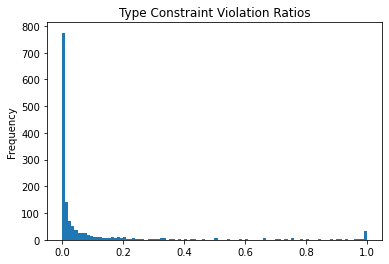

In [44]:
typeConstDF['violation_ratio'].plot.hist(bins=100).set_title("Type Constraint Violation Ratios")

Text(0.5, 1.0, 'Type Constraint Violation Ratios (<=0.05)')

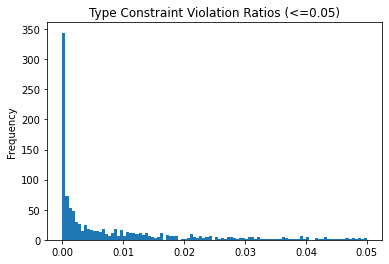

In [45]:
typeConstDF[typeConstDF['violation_ratio'] <= 0.05].violation_ratio.plot.hist(bins=100).set_title("Type Constraint Violation Ratios (<=0.05)")

In [46]:
print(f"No. of constraints whose violation ratio is greater than mean :{sum(typeConstDF['violation_ratio'] >= 5.286054)}/{len(typeConstDF)}")

No. of constraints whose violation ratio is greater than mean :0/1456


In [47]:
# typeConstDF.sort_values(by=['incorrect'],ascending=False).head(5).paths.values

In [48]:
# !cat ../../allConstraintsAnalysis_Final/typeConstraint/normal/claims.type-constraints.instanceOf.P953.incorrect.tsv

In [49]:
for key1 in typeConstViolations.keys():
    typeConstViolations[key1]['correct'] = typeConstViolations[key1]['instanceOf']['correct'] + typeConstViolations[key1]['subclass']['correct'] + typeConstViolations[key1]['instanceOfOrSubclass']['correct']
    typeConstViolations[key1]['incorrect'] = typeConstViolations[key1]['instanceOf']['incorrect'] + typeConstViolations[key1]['subclass']['incorrect'] + typeConstViolations[key1]['instanceOfOrSubclass']['incorrect']
    typeConstViolations[key1]['VR'] = typeConstViolations[key1]['incorrect'] / (typeConstViolations[key1]['correct'] + typeConstViolations[key1]['incorrect'])
        

In [50]:
typeConstViolations

{'mandatory': {'instanceOf': {'correct': 44768778, 'incorrect': 35027},
  'subclass': {'correct': 1966, 'incorrect': 30},
  'instanceOfOrSubclass': {'correct': 221394, 'incorrect': 204},
  'propCount': 165,
  'correct': 44992138,
  'incorrect': 35261,
  'VR': 0.0007831009736982587},
 'suggestion': {'instanceOf': {'correct': 61486, 'incorrect': 18368},
  'subclass': {'correct': 0, 'incorrect': 0},
  'instanceOfOrSubclass': {'correct': 23314, 'incorrect': 2939},
  'propCount': 11,
  'correct': 84800,
  'incorrect': 21307,
  'VR': 0.200806732826298},
 'normal': {'instanceOf': {'correct': 398100301, 'incorrect': 797888},
  'subclass': {'correct': 96605, 'incorrect': 9442},
  'instanceOfOrSubclass': {'correct': 66358710, 'incorrect': 265583},
  'propCount': 1280,
  'correct': 464555616,
  'incorrect': 1072913,
  'VR': 0.0023042252207016293}}

In [51]:
typeConstDF['total'] = typeConstDF['correct'] + typeConstDF['incorrect']
typeConstDF.sort_values(by=['total'],ascending=False).head()

correct incorrect                                              paths  \
P2093  134805157      6527  [../../allConstraintsAnalysis/typeConstraint_F...   
P1476   39856876     47204  [../../allConstraintsAnalysis/typeConstraint_F...   
P577    38855314     33977  [../../allConstraintsAnalysis/typeConstraint_F...   
P1433   36723283     12050  [../../allConstraintsAnalysis/typeConstraint_F...   
P1215   33099195     24104  [../../allConstraintsAnalysis/typeConstraint_F...   

       violation_ratio      total  
P2093         0.000048  134811684  
P1476         0.001183   39904080  
P577          0.000874   38889291  
P1433         0.000328   36735333  
P1215         0.000728   33123299

In [52]:
typeConstDF.to_csv('../../allConstraintsAnalysis_Final/typeConstDFAnalysis.csv')

### Find out time required

In [18]:
# from tqdm.notebook import tqdm
# import os.path

# cnt = 0
# fCnt = 1
# for prop in tqdm(df1.node1.unique()):
#     try:
#         if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop +".tsv")):
#             continue
#         relation = df1[(df1['node1'] == prop) & (df1['label'] == 'P2309')].node2.values[0][0]
#         type1 = df1[(df1['node1'] == prop) & (df1['label'] == 'P2316')].node2.values

#         parents = df1[(df1['node1'] == prop) & (df1['label'] == 'P2308')].node2.values[0]
#         exceptions = df1[(df1['node1'] == prop) & (df1['label'] == 'P2303')].node2.values

# #         print(prop, relation, type1, parents, exceptions)

#         if relation == "Q21503252":
#             parentFile = "P31P279star"
#             parentTitle = 'instanceOf'
#         elif relation == "Q21514624":
#             parentFile = "P279star"
#             parentTitle = 'subclass'
#         else:
#             parentFile = "isastar"
#             parentTitle = 'instanceOfOrSubclass'

#         if len(type1) != 0 and type1[0][0] == "Q21502408":
#             typeVal = "mandatory"
#         elif len(type1) != 0 and type1[0][0] == "Q62026391":
#             typeVal = "suggestion"
#         else:
#             typeVal = "normal"

#         if len(exceptions):
#             exceptionPart = "or node1 in " + str(exceptions[0]).replace("'",'"')
#         else:
#             exceptionPart = ""
        
#         if cnt % 100 == 0:
#             fOP = open("../../propertiesSplit_Final/checkViolations/TimedTypeConstraintValidator" + str(fCnt) + ".sh","w")
#             fCnt += 1
        
#         fOP.write("{ time kgtk --debug query -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
#         ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
#         --match 'm: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)' \
#         --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
#         --return 'nodeProp.id, node1, nodeProp.label, node2' \
#         -o ../../allConstraintsAnalysis_Final/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
#         --graph-cache ~/sqlite3_caches/const2123_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/TimedTypeConstraint_TimedTypeConstraintValidator" + str(fCnt) + ".txt ; \
#          kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
#         --filter-on ../../allConstraintsAnalysis_Final/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
#         --filter-mode NONE \
#         --input-keys node1 label \
#         --filter-keys node1 label \
#         -o ../../allConstraintsAnalysis_Final/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv\n")

#         cnt += 1
#     except:
#         print("Something failed for prop:",prop)
    

In [93]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplit_Final/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("typeConstraintValidator"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/122 [00:00<?, ?it/s]

In [94]:
print(pd.Series(times).describe())

count    1456.000000
mean      138.470137
std       216.121977
min         2.111000
25%        23.664500
50%        43.875000
75%       158.037250
max      2177.421000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for type constraint checks')

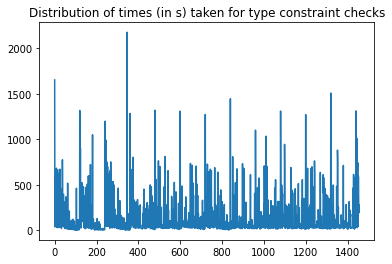

In [95]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for type constraint checks")

## Value Type Constraint

### Understand Constraints File

In [44]:
import pandas as pd
dfValueType = pd.read_csv('../../constraintsOP/valuetypeConstraint/claims.type-constraints_all1.tsv',sep='\t')

In [45]:
dfValueType = dfValueType.groupby(['node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [46]:
dfValueType.head()

node1  label                                              node2
0  P1000  P2308                                         [Q1241356]
1  P1000  P2309                                        [Q30208840]
2  P1001  P2308  [Q20926517, Q2881272, Q2882257, Q3624078, Q389...
3  P1001  P2309                                        [Q30208840]
4  P1002  P2308                                         [Q2576663]

In [47]:
dfValueType['label'].unique()

array(['P2308', 'P2309', 'P2303', 'P2316', 'P6607', 'P2304'], dtype=object)

In [48]:
dfValueType[dfValueType['label'] == '2316']

Empty DataFrame
Columns: [node1, label, node2]
Index: []

In [49]:
dfValueType[dfValueType['node1'] == 'P1659']

node1  label        node2
330  P1659  P2308  [Q18616576]
331  P1659  P2309  [Q21503252]
332  P1659  P2316  [Q21502408]

In [50]:
dfValueType[dfValueType.node1 == 'P991']

node1  label           node2
2031  P991  P2308  [Q5, Q7210356]
2032  P991  P2309     [Q21503252]

### Query Generator

In [51]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 1

fOP = None

for prop in tqdm(dfValueType.node1.unique()):
    try:
        if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop +".tsv")):
            continue
        relation = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2309')].node2.values[0][0]
        type1 = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2316')].node2.values
#         print(type1)

        parents = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2308')].node2.values[0]
        exceptions = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2303')].node2.values
        
        if relation == "Q21503252":
            parentFile = "P31"
            parentTitle = 'instanceOf'
        elif relation == "Q21514624":
            parentFile = "P279"
            parentTitle = 'subclass'
        else:
            parentFile = "isa"
            parentTitle = 'instanceOfOrSubclass'

        if len(type1) != 0 and type1[0][0] == "Q21502408":
            typeVal = "mandatory"
        elif len(type1) != 0 and type1[0][0] == "Q62026391":
            typeVal = "suggestion"
        else:
            typeVal = "normal"

        if len(exceptions):
            exceptionPart = "or node2 in " + str(exceptions[0]).replace("'",'"')
        else:
            exceptionPart = ""
        
        folderName = 'valueTypeConstraint'
        shellFileSuffix = 'valueTypeConstraintValidator'
        
        if cnt % 120 == 0:
            if fOP:
                fOP.close()
            fOP = open("../../propertiesSplit_Final/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
            fCnt += 1
        
        fOP.write("{ time (kgtk --debug query -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
        ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
        ../../wikidata-20210215/derived.P279star.tsv.gz \
        --match 'm: (node1)-[nodeProp]->(node2), " + parentFile + ": (node2)-[]->(nodex), P279star: (nodex)-[]->(par)' \
        --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
        --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`' \
        -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct_temp.tsv \
        --graph-cache ~/sqlite3_caches/valueType_new12_2123_" + str(fCnt) + ".sqlite3.db; \
         kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
        --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct_temp.tsv \
        -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect_temp.tsv ;\
        kgtk --debug query -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect_temp.tsv \
        ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
        --match 'm: (node1)-[nodeProp]->(node2), " + parentFile + ": (node2)-[]->(par)' \
        --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
        --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`' \
        -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct_temp2.tsv \
        --graph-cache ~/sqlite3_caches/valueType_new12_2123_" + str(fCnt) + ".sqlite3.db; \
         kgtk --debug ifnotexists -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect_temp.tsv \
        --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct_temp2.tsv \
        -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv ; \
         kgtk --debug cat -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct_temp.tsv \
        ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct_temp2.tsv \
        -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv ; \
        ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n")

        cnt += 1
    except:
        print("Something failed for prop:",prop)

if fOP:
    fOP.close()

  0%|          | 0/932 [00:00<?, ?it/s]

Something failed for prop: P1389


In [52]:
cnt

897

In [53]:
import os
for i in range(1,9):
    os.system("screen -dm sh ../../propertiesSplit_Final/checkViolations/valueTypeConstraintValidator"+str(i)+".sh")
    

### Analyze Violations

In [21]:
import pandas as pd
import os
from tqdm.notebook import tqdm

valueTypeConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

valueTypePropList = set()

violations = {}

for folder in tqdm(iter(['mandatory', 'suggestion', 'normal'])):
    valueTypeConstViolations[folder] = {'instanceOf': {'correct': 0, 'incorrect': 0}, 'subclass': {'correct': 0, 'incorrect': 0}, 'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0}, 'propCount':0}
    filePath = "../../allConstraintsAnalysis_Final/valuetypeConstraint_Final4/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        type1 = filename.split(".")[2]
        prop = filename.split(".")[3]
        valueTypePropList.add(prop)
        correctness = filename.split(".")[4]
        count1 = countLines(filePath+filename)
        valueTypeConstViolations[folder][type1][correctness] += count1
        if prop not in violations:
            violations[prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        violations[prop][correctness] = count1
        violations[prop]['paths'].append(filePath+filename)
        if correctness == 'correct':
            valueTypeConstViolations[folder]['propCount'] += 1
        

0it [00:00, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1572 [00:00<?, ?it/s]

In [22]:
# countLines("../../allConstraintsAnalysis_Final/typeConstraint/mandatory/claims.type-constraints.subclass.P534.incorrect.tsv")

In [23]:
recordCount = 0
for elem in valueTypeConstViolations.keys():
    for key1 in valueTypeConstViolations[elem].keys():
        try:
            recordCount += valueTypeConstViolations[elem][key1]['correct'] + valueTypeConstViolations[elem][key1]['incorrect']
        except:
            continue
print(f"{len(valueTypePropList)} properties processed for value type constraint for {recordCount} statements")

897 properties processed for value type constraint for 181823950 statements


In [24]:
import pandas as pd
valTypeConstDF = pd.DataFrame(violations).T

In [25]:
valTypeConstDF['violation_ratio'] = valTypeConstDF.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)

In [26]:
valTypeConstDF.head()

correct incorrect                                              paths  \
P2302   42211         0  [../../allConstraintsAnalysis/valuetypeConstra...   
P3092    4620         1  [../../allConstraintsAnalysis/valuetypeConstra...   
P3096   11150         2  [../../allConstraintsAnalysis/valuetypeConstra...   
P3156     348         0  [../../allConstraintsAnalysis/valuetypeConstra...   
P87      4766         3  [../../allConstraintsAnalysis/valuetypeConstra...   

       violation_ratio  
P2302         0.000000  
P3092         0.000216  
P3096         0.000179  
P3156         0.000000  
P87           0.000629

In [27]:
valTypeConstDF.sort_values(by=['violation_ratio','incorrect'],ascending=False).head(15)

correct incorrect                                              paths  \
P5008       0    331026  [../../allConstraintsAnalysis/valuetypeConstra...   
P6104       0      9764  [../../allConstraintsAnalysis/valuetypeConstra...   
P2545       0      1369  [../../allConstraintsAnalysis/valuetypeConstra...   
P2668       0       168  [../../allConstraintsAnalysis/valuetypeConstra...   
P7374       0        32  [../../allConstraintsAnalysis/valuetypeConstra...   
P2839       0        14  [../../allConstraintsAnalysis/valuetypeConstra...   
P3028       0        13  [../../allConstraintsAnalysis/valuetypeConstra...   
P3027       0        12  [../../allConstraintsAnalysis/valuetypeConstra...   
P2127       0        11  [../../allConstraintsAnalysis/valuetypeConstra...   
P538        0        10  [../../allConstraintsAnalysis/valuetypeConstra...   
P143        0         7  [../../allConstraintsAnalysis/valuetypeConstra...   
P4425       0         6  [../../allConstraintsAnalysis/valuetypeConstra...   
P6191       0         5  [../../allConstraintsAnalysis/valuetypeConstra...   
P6533       0         5  [../../allConstraintsAnalysis/valuetypeConstra...   
P6534       0         5  [../../allConstraintsAnalysis/valuetypeConstra...   

       violation_ratio  
P5008              1.0  
P6104              1.0  
P2545              1.0  
P2668              1.0  
P7374              1.0  
P2839              1.0  
P3028              1.0  
P3027              1.0  
P2127              1.0  
P538               1.0  
P143               1.0  
P4425              1.0  
P6191              1.0  
P6533              1.0  
P6534              1.0

In [2]:
!cat ../../allConstraintsAnalysis_Final/valuetypeConstraint_Final4/normal/claims.type-constraints.instanceOf.P5008.incorrect.tsv

id	node1	label	node2	rank	node2;wikidatatype
P4203-P5008-Q19794158-515f4c63-0	P4203	P5008	Q19794158	normal	wikibase-item
P5588-P5008-Q56241615-f715260d-0	P5588	P5008	Q56241615	normal	wikibase-item
P5626-P5008-Q56241615-b866338e-0	P5626	P5008	Q56241615	normal	wikibase-item
P5698-P5008-Q56241615-1ffb183c-0	P5698	P5008	Q56241615	normal	wikibase-item
P8365-P5008-Q98970039-e9e140e8-0	P8365	P5008	Q98970039	normal	wikibase-item
P8370-P5008-Q98970039-690f8eed-0	P8370	P5008	Q98970039	normal	wikibase-item
P8374-P5008-Q98970039-47e6c1ed-0	P8374	P5008	Q98970039	normal	wikibase-item
P8516-P5008-Q98970039-2def31d7-0	P8516	P5008	Q98970039	normal	wikibase-item
P8539-P5008-Q98970039-66ef67cc-0	P8539	P5008	Q98970039	normal	wikibase-item
P8540-P5008-Q98970039-e1bf5c19-0	P8540	P5008	Q98970039	normal	wikibase-item
P8563-P5008-Q98970039-4ab14d04-0	P8563	P5008	Q98970039	normal	wikibase-item
P8614-P5008-Q98970039-d471aa3e-0	P8614	P5008	Q98970039	normal	wikibase-item
P8629-P5008-Q98970039-e973e3f9-0	P8629	P500

Q101540521-P5008-Q98970039-493ed584-0	Q101540521	P5008	Q98970039	normal	wikibase-item
Q101540627-P5008-Q98970039-d8efd450-0	Q101540627	P5008	Q98970039	normal	wikibase-item
Q101540721-P5008-Q98970039-fc668fa3-0	Q101540721	P5008	Q98970039	normal	wikibase-item
Q101541502-P5008-Q98970039-697485ae-0	Q101541502	P5008	Q98970039	normal	wikibase-item
Q101541816-P5008-Q98970039-9b3b823b-0	Q101541816	P5008	Q98970039	normal	wikibase-item
Q101541861-P5008-Q100137722-3fe1e3d4-0	Q101541861	P5008	Q100137722	normal	wikibase-item
Q101542003-P5008-Q100137722-aeb205c7-0	Q101542003	P5008	Q100137722	normal	wikibase-item
Q101542237-P5008-Q100742996-9ca0358f-0	Q101542237	P5008	Q100742996	normal	wikibase-item
Q101542309-P5008-Q100742996-e7452df1-0	Q101542309	P5008	Q100742996	normal	wikibase-item
Q101542323-P5008-Q100742996-39d8298a-0	Q101542323	P5008	Q100742996	normal	wikibase-item
Q101542324-P5008-Q100742996-45ee5967-0	Q101542324	P5008	Q100742996	normal	wikibase-item
Q101542325-P5008-Q100742996-7a66e102-0	Q10

Q102272687-P5008-Q98970042-36954532-0	Q102272687	P5008	Q98970042	normal	wikibase-item
Q102272688-P5008-Q98970042-c888c6a4-0	Q102272688	P5008	Q98970042	normal	wikibase-item
Q102272690-P5008-Q98970042-05ac4a79-0	Q102272690	P5008	Q98970042	normal	wikibase-item
Q102272764-P5008-Q98970042-fbfdd328-0	Q102272764	P5008	Q98970042	normal	wikibase-item
Q102272765-P5008-Q98970042-f2405b10-0	Q102272765	P5008	Q98970042	normal	wikibase-item
Q102272768-P5008-Q98970042-e8982633-0	Q102272768	P5008	Q98970042	normal	wikibase-item
Q102272770-P5008-Q98970042-ab6669c5-0	Q102272770	P5008	Q98970042	normal	wikibase-item
Q102272888-P5008-Q98970042-033dffb7-0	Q102272888	P5008	Q98970042	normal	wikibase-item
Q102272889-P5008-Q98970042-459ea468-0	Q102272889	P5008	Q98970042	normal	wikibase-item
Q102272890-P5008-Q98970042-5d69d23d-0	Q102272890	P5008	Q98970042	normal	wikibase-item
Q102272892-P5008-Q98970042-5478f6db-0	Q102272892	P5008	Q98970042	normal	wikibase-item
Q102272893-P5008-Q98970042-dcda86d9-0	Q102272893	P5008

Q102713184-P5008-Q98970042-da3f63b0-0	Q102713184	P5008	Q98970042	normal	wikibase-item
Q102713189-P5008-Q98970042-d1c17742-0	Q102713189	P5008	Q98970042	normal	wikibase-item
Q102713193-P5008-Q98970042-4c769543-0	Q102713193	P5008	Q98970042	normal	wikibase-item
Q102713196-P5008-Q98970042-66b79039-0	Q102713196	P5008	Q98970042	normal	wikibase-item
Q102713205-P5008-Q98970042-e0bfcd03-0	Q102713205	P5008	Q98970042	normal	wikibase-item
Q10272063-P5008-Q98099248-2aa47147-0	Q10272063	P5008	Q98099248	normal	wikibase-item
Q102725979-P5008-Q98970042-d1aedde6-0	Q102725979	P5008	Q98970042	normal	wikibase-item
Q102725982-P5008-Q98970042-c8e1efbe-0	Q102725982	P5008	Q98970042	normal	wikibase-item
Q102725987-P5008-Q98970042-2971cb73-0	Q102725987	P5008	Q98970042	normal	wikibase-item
Q102725990-P5008-Q98970042-2b0a2f89-0	Q102725990	P5008	Q98970042	normal	wikibase-item
Q102725996-P5008-Q98970042-7112efb7-0	Q102725996	P5008	Q98970042	normal	wikibase-item
Q102725998-P5008-Q98970042-c9b16552-0	Q102725998	P5008	Q

Q1130724-P5008-Q24909800-c688c985-0	Q1130724	P5008	Q24909800	normal	wikibase-item
Q113081-P5008-Q69524601-09fbb4f4-0	Q113081	P5008	Q69524601	normal	wikibase-item
Q11309346-P5008-Q24909800-6d1ce6c3-0	Q11309346	P5008	Q24909800	normal	wikibase-item
Q113099-P5008-Q24909800-56f3854d-0	Q113099	P5008	Q24909800	normal	wikibase-item
Q1130994-P5008-Q66098665-219dd30d-0	Q1130994	P5008	Q66098665	normal	wikibase-item
Q1131001-P5008-Q66098665-54ecca73-0	Q1131001	P5008	Q66098665	normal	wikibase-item
Q1131042-P5008-Q66098665-c95f2fc7-0	Q1131042	P5008	Q66098665	normal	wikibase-item
Q1131043-P5008-Q66098665-6472527b-0	Q1131043	P5008	Q66098665	normal	wikibase-item
Q1131048-P5008-Q66098665-3fcb19c7-0	Q1131048	P5008	Q66098665	normal	wikibase-item
Q1131051-P5008-Q66098665-aa8bdf22-0	Q1131051	P5008	Q66098665	normal	wikibase-item
Q1131053-P5008-Q66098665-19525f92-0	Q1131053	P5008	Q66098665	normal	wikibase-item
Q1131054-P5008-Q66098665-d584f70f-0	Q1131054	P5008	Q66098665	normal	wikibase-item
Q1131059-P5008-Q66

Q13481376-P5008-Q66098665-5d3e484c-0	Q13481376	P5008	Q66098665	normal	wikibase-item
Q13481386-P5008-Q66098665-0e877073-0	Q13481386	P5008	Q66098665	normal	wikibase-item
Q13481396-P5008-Q66098665-9d5efc90-0	Q13481396	P5008	Q66098665	normal	wikibase-item
Q134814-P5008-Q56810037-36d8561d-0	Q134814	P5008	Q56810037	normal	wikibase-item
Q13481407-P5008-Q66098665-0686e9eb-0	Q13481407	P5008	Q66098665	normal	wikibase-item
Q13481418-P5008-Q66098665-933baff3-0	Q13481418	P5008	Q66098665	normal	wikibase-item
Q13481434-P5008-Q66098665-50b48173-0	Q13481434	P5008	Q66098665	normal	wikibase-item
Q13481443-P5008-Q66098665-7f6b4c0b-0	Q13481443	P5008	Q66098665	normal	wikibase-item
Q13481452-P5008-Q66098665-76ca390b-0	Q13481452	P5008	Q66098665	normal	wikibase-item
Q13481465-P5008-Q66098665-21623b5a-0	Q13481465	P5008	Q66098665	normal	wikibase-item
Q13481477-P5008-Q66098665-8255ef33-0	Q13481477	P5008	Q66098665	normal	wikibase-item
Q13481488-P5008-Q66098665-0af9cf10-0	Q13481488	P5008	Q66098665	normal	wikibase-i

Q14622591-P5008-Q66098665-de835be1-0	Q14622591	P5008	Q66098665	normal	wikibase-item
Q146227-P5008-Q85931561-b0c33258-0	Q146227	P5008	Q85931561	normal	wikibase-item
Q1462309-P5008-Q4099686-eccd74bd-0	Q1462309	P5008	Q4099686	normal	wikibase-item
Q1462317-P5008-Q66098665-9f28b361-0	Q1462317	P5008	Q66098665	normal	wikibase-item
Q1462321-P5008-Q66098665-9741b1aa-0	Q1462321	P5008	Q66098665	normal	wikibase-item
Q14623252-P5008-Q15304953-aa5f6bc0-0	Q14623252	P5008	Q15304953	normal	wikibase-item
Q146238-P5008-Q13382529-75c708b7-0	Q146238	P5008	Q13382529	normal	wikibase-item
Q1462491-P5008-Q66098665-7df38a8a-0	Q1462491	P5008	Q66098665	normal	wikibase-item
Q14624995-P5008-Q66098665-e7f19ca7-0	Q14624995	P5008	Q66098665	normal	wikibase-item
Q14624996-P5008-Q66098665-76849756-0	Q14624996	P5008	Q66098665	normal	wikibase-item
Q14624997-P5008-Q66098665-8ea02274-0	Q14624997	P5008	Q66098665	normal	wikibase-item
Q14624998-P5008-Q66098665-1c415b37-0	Q14624998	P5008	Q66098665	normal	wikibase-item
Q14624999-

Q16014336-P5008-Q15304953-d8bc3c8f-0	Q16014336	P5008	Q15304953	normal	wikibase-item
Q16014458-P5008-Q24909800-1a6f8138-0	Q16014458	P5008	Q24909800	normal	wikibase-item
Q160145-P5008-Q69524601-83ca50b4-0	Q160145	P5008	Q69524601	normal	wikibase-item
Q16014543-P5008-Q98755339-2959c8c8-0	Q16014543	P5008	Q98755339	normal	wikibase-item
Q16014545-P5008-Q15304953-a0ca2c5a-0	Q16014545	P5008	Q15304953	normal	wikibase-item
Q16014741-P5008-Q55322495-43a18d4b-0	Q16014741	P5008	Q55322495	normal	wikibase-item
Q16014899-P5008-Q15304953-96ac029e-0	Q16014899	P5008	Q15304953	normal	wikibase-item
Q16014908-P5008-Q15304953-e9b548d3-0	Q16014908	P5008	Q15304953	normal	wikibase-item
Q16015073-P5008-Q24909800-a2e2c6eb-0	Q16015073	P5008	Q24909800	normal	wikibase-item
Q16015125-P5008-Q15304953-6ec918d0-0	Q16015125	P5008	Q15304953	normal	wikibase-item
Q160152-P5008-Q13382529-d6bd3729-0	Q160152	P5008	Q13382529	normal	wikibase-item
Q16015205-P5008-Q13382529-d1e8fdb4-0	Q16015205	P5008	Q13382529	normal	wikibase-item


Q17144153-P5008-Q4099686-ba4390f6-0	Q17144153	P5008	Q4099686	normal	wikibase-item
Q17144188-P5008-Q4099686-6c3ed66a-0	Q17144188	P5008	Q4099686	normal	wikibase-item
Q17144217-P5008-Q4099686-45ab9752-0	Q17144217	P5008	Q4099686	normal	wikibase-item
Q17144221-P5008-Q13382529-189871e5-0	Q17144221	P5008	Q13382529	normal	wikibase-item
Q17144348-P5008-Q15304953-30f6c004-0	Q17144348	P5008	Q15304953	normal	wikibase-item
Q17145464-P5008-Q24909800-f061d76a-0	Q17145464	P5008	Q24909800	normal	wikibase-item
Q17145506-P5008-Q67147253-6ab5569b-0	Q17145506	P5008	Q67147253	normal	wikibase-item
Q17145626-P5008-Q4099686-1e491efe-0	Q17145626	P5008	Q4099686	normal	wikibase-item
Q17146000-P5008-Q4099686-0b73c49e-0	Q17146000	P5008	Q4099686	normal	wikibase-item
Q17146028-P5008-Q24909800-02f7126e-0	Q17146028	P5008	Q24909800	normal	wikibase-item
Q17146304-P5008-Q13382529-4e5502a0-0	Q17146304	P5008	Q13382529	normal	wikibase-item
Q17146579-P5008-Q87748614-273bef80-0	Q17146579	P5008	Q87748614	normal	wikibase-item
Q1

Q18554164-P5008-Q4099686-4d944963-0	Q18554164	P5008	Q4099686	normal	wikibase-item
Q18554169-P5008-Q4099686-18e060f3-0	Q18554169	P5008	Q4099686	normal	wikibase-item
Q18554170-P5008-Q4099686-9f0a541a-0	Q18554170	P5008	Q4099686	normal	wikibase-item
Q18554171-P5008-Q4099686-f22c41b5-0	Q18554171	P5008	Q4099686	normal	wikibase-item
Q18554172-P5008-Q4099686-2918cd03-0	Q18554172	P5008	Q4099686	normal	wikibase-item
Q18554173-P5008-Q4099686-0a8877ca-0	Q18554173	P5008	Q4099686	normal	wikibase-item
Q18554175-P5008-Q4099686-e725c249-0	Q18554175	P5008	Q4099686	normal	wikibase-item
Q18554178-P5008-Q4099686-d5228856-0	Q18554178	P5008	Q4099686	normal	wikibase-item
Q18554179-P5008-Q4099686-76eba248-0	Q18554179	P5008	Q4099686	normal	wikibase-item
Q18554180-P5008-Q4099686-e1a5352d-0	Q18554180	P5008	Q4099686	normal	wikibase-item
Q18554181-P5008-Q4099686-c57c400a-0	Q18554181	P5008	Q4099686	normal	wikibase-item
Q18554182-P5008-Q4099686-192b4377-0	Q18554182	P5008	Q4099686	normal	wikibase-item
Q18554183-P5008-

Q18557709-P5008-Q4099686-ed74e6c4-0	Q18557709	P5008	Q4099686	normal	wikibase-item
Q18557710-P5008-Q4099686-b30a9039-0	Q18557710	P5008	Q4099686	normal	wikibase-item
Q18557711-P5008-Q4099686-4511cc74-0	Q18557711	P5008	Q4099686	normal	wikibase-item
Q18557712-P5008-Q4099686-54e1da7d-0	Q18557712	P5008	Q4099686	normal	wikibase-item
Q18557713-P5008-Q4099686-6103b78c-0	Q18557713	P5008	Q4099686	normal	wikibase-item
Q18557715-P5008-Q4099686-ebeb7a9b-0	Q18557715	P5008	Q4099686	normal	wikibase-item
Q18557716-P5008-Q4099686-20ac3799-0	Q18557716	P5008	Q4099686	normal	wikibase-item
Q18557717-P5008-Q4099686-1d8bd23b-0	Q18557717	P5008	Q4099686	normal	wikibase-item
Q18557718-P5008-Q4099686-005da249-0	Q18557718	P5008	Q4099686	normal	wikibase-item
Q18557721-P5008-Q4099686-9c9c4fe0-0	Q18557721	P5008	Q4099686	normal	wikibase-item
Q18557722-P5008-Q4099686-e77926c0-0	Q18557722	P5008	Q4099686	normal	wikibase-item
Q18557723-P5008-Q4099686-a97972f0-0	Q18557723	P5008	Q4099686	normal	wikibase-item
Q18557724-P5008-

Q18975271-P5008-Q4099686-ba416894-0	Q18975271	P5008	Q4099686	normal	wikibase-item
Q18975272-P5008-Q4099686-33f3487b-0	Q18975272	P5008	Q4099686	normal	wikibase-item
Q18975275-P5008-Q4099686-2b627cde-0	Q18975275	P5008	Q4099686	normal	wikibase-item
Q18975283-P5008-Q4099686-28992c3f-0	Q18975283	P5008	Q4099686	normal	wikibase-item
Q18975290-P5008-Q4099686-4ac0a568-0	Q18975290	P5008	Q4099686	normal	wikibase-item
Q18975291-P5008-Q4099686-066b7d90-0	Q18975291	P5008	Q4099686	normal	wikibase-item
Q18975292-P5008-Q4099686-c49b19cb-0	Q18975292	P5008	Q4099686	normal	wikibase-item
Q18975304-P5008-Q4099686-4cbef1ce-0	Q18975304	P5008	Q4099686	normal	wikibase-item
Q18975309-P5008-Q4099686-d1abac72-0	Q18975309	P5008	Q4099686	normal	wikibase-item
Q18975311-P5008-Q4099686-4fbb96cc-0	Q18975311	P5008	Q4099686	normal	wikibase-item
Q18975321-P5008-Q4099686-3868a186-0	Q18975321	P5008	Q4099686	normal	wikibase-item
Q18975322-P5008-Q4099686-6b5256f0-0	Q18975322	P5008	Q4099686	normal	wikibase-item
Q18975323-P5008-

Q19754738-P5008-Q60687720-a5ebf637-0	Q19754738	P5008	Q60687720	normal	wikibase-item
Q19754757-P5008-Q58468254-f9f7eb91-0	Q19754757	P5008	Q58468254	normal	wikibase-item
Q19754757-P5008-Q60687720-3583c414-0	Q19754757	P5008	Q60687720	normal	wikibase-item
Q19754950-P5008-Q60687720-6fb304e4-0	Q19754950	P5008	Q60687720	normal	wikibase-item
Q19755067-P5008-Q60687720-4b4dea43-0	Q19755067	P5008	Q60687720	normal	wikibase-item
Q19755816-P5008-Q58468254-dd881b87-0	Q19755816	P5008	Q58468254	normal	wikibase-item
Q19756134-P5008-Q58468254-14de060f-0	Q19756134	P5008	Q58468254	normal	wikibase-item
Q19756268-P5008-Q60687720-09ddab20-0	Q19756268	P5008	Q60687720	normal	wikibase-item
Q19756283-P5008-Q24909800-fe7faa55-0	Q19756283	P5008	Q24909800	normal	wikibase-item
Q19757448-P5008-Q15304953-2ae1e558-0	Q19757448	P5008	Q15304953	normal	wikibase-item
Q19757448-P5008-Q94124522-43a9ad4f-0	Q19757448	P5008	Q94124522	normal	wikibase-item
Q19757452-P5008-Q15304953-00f70009-0	Q19757452	P5008	Q15304953	normal	wikiba

Q21066276-P5008-Q15304953-9ad1199f-0	Q21066276	P5008	Q15304953	normal	wikibase-item
Q21066633-P5008-Q60687720-7609a6de-0	Q21066633	P5008	Q60687720	normal	wikibase-item
Q21066669-P5008-Q67147253-00ebe6d4-0	Q21066669	P5008	Q67147253	normal	wikibase-item
Q21066680-P5008-Q67147253-6bb6cf2c-0	Q21066680	P5008	Q67147253	normal	wikibase-item
Q21066907-P5008-Q24909800-84f86a34-0	Q21066907	P5008	Q24909800	normal	wikibase-item
Q21067123-P5008-Q24909800-47217e36-0	Q21067123	P5008	Q24909800	normal	wikibase-item
Q21067173-P5008-Q24909800-769a6d24-0	Q21067173	P5008	Q24909800	normal	wikibase-item
Q21067341-P5008-Q60687720-5de8e5fb-0	Q21067341	P5008	Q60687720	normal	wikibase-item
Q21067868-P5008-Q24909800-f121ef1c-0	Q21067868	P5008	Q24909800	normal	wikibase-item
Q21068012-P5008-Q13382529-26743090-0	Q21068012	P5008	Q13382529	normal	wikibase-item
Q21068012-P5008-Q15304953-4f8a01fa-0	Q21068012	P5008	Q15304953	normal	wikibase-item
Q21068127-P5008-Q13382529-e566c74c-0	Q21068127	P5008	Q13382529	normal	wikiba

Q21972895-P5008-Q85931561-0bf6acb4-0	Q21972895	P5008	Q85931561	normal	wikibase-item
Q21972896-P5008-Q85931561-af3b374a-0	Q21972896	P5008	Q85931561	normal	wikibase-item
Q21972897-P5008-Q85931561-5120b837-0	Q21972897	P5008	Q85931561	normal	wikibase-item
Q21972898-P5008-Q85931561-d357c7f0-0	Q21972898	P5008	Q85931561	normal	wikibase-item
Q21972899-P5008-Q85931561-bcd623f8-0	Q21972899	P5008	Q85931561	normal	wikibase-item
Q21972900-P5008-Q85931561-4aaec71d-0	Q21972900	P5008	Q85931561	normal	wikibase-item
Q21972901-P5008-Q85931561-1b4e1957-0	Q21972901	P5008	Q85931561	normal	wikibase-item
Q21972902-P5008-Q85931561-8b9c3894-0	Q21972902	P5008	Q85931561	normal	wikibase-item
Q21972903-P5008-Q85931561-20ee0fc7-0	Q21972903	P5008	Q85931561	normal	wikibase-item
Q21972904-P5008-Q85931561-0f048aaf-0	Q21972904	P5008	Q85931561	normal	wikibase-item
Q21972905-P5008-Q85931561-e45a7e83-0	Q21972905	P5008	Q85931561	normal	wikibase-item
Q21972906-P5008-Q85931561-4a460870-0	Q21972906	P5008	Q85931561	normal	wikiba

Q2376219-P5008-Q4099686-f20e53af-0	Q2376219	P5008	Q4099686	normal	wikibase-item
Q23762327-P5008-Q15304953-7a20f7b8-0	Q23762327	P5008	Q15304953	normal	wikibase-item
Q23762449-P5008-Q63845230-8ba8aab3-0	Q23762449	P5008	Q63845230	normal	wikibase-item
Q23762552-P5008-Q15304953-51d9bc9a-0	Q23762552	P5008	Q15304953	normal	wikibase-item
Q2376264-P5008-Q4099686-8b35308b-0	Q2376264	P5008	Q4099686	normal	wikibase-item
Q23762774-P5008-Q24909800-348d3eb2-0	Q23762774	P5008	Q24909800	normal	wikibase-item
Q237633-P5008-Q15304953-16127fd7-0	Q237633	P5008	Q15304953	normal	wikibase-item
Q23763787-P5008-Q54439832-27daae7a-0	Q23763787	P5008	Q54439832	normal	wikibase-item
Q2376389-P5008-Q66098665-669ef6bc-0	Q2376389	P5008	Q66098665	normal	wikibase-item
Q2376397-P5008-Q66098665-8a5cf7ed-0	Q2376397	P5008	Q66098665	normal	wikibase-item
Q237651-P5008-Q60687720-8ffddf2a-0	Q237651	P5008	Q60687720	normal	wikibase-item
Q2376518-P5008-Q4099686-ada03541-0	Q2376518	P5008	Q4099686	normal	wikibase-item
Q23765425-P5008-

Q24632447-P5008-Q55439927-95ee35d3-0	Q24632447	P5008	Q55439927	normal	wikibase-item
Q24632524-P5008-Q55439927-c0544213-0	Q24632524	P5008	Q55439927	normal	wikibase-item
Q24632533-P5008-Q55439927-156a7ec8-0	Q24632533	P5008	Q55439927	normal	wikibase-item
Q24632655-P5008-Q55439927-5399b36c-0	Q24632655	P5008	Q55439927	normal	wikibase-item
Q24632764-P5008-Q55439927-c541b6c4-0	Q24632764	P5008	Q55439927	normal	wikibase-item
Q24633044-P5008-Q55439927-0b99e411-0	Q24633044	P5008	Q55439927	normal	wikibase-item
Q24633070-P5008-Q55439927-5f97f264-0	Q24633070	P5008	Q55439927	normal	wikibase-item
Q24633113-P5008-Q55439927-6f1314bb-0	Q24633113	P5008	Q55439927	normal	wikibase-item
Q24633277-P5008-Q55439927-16a54dd3-0	Q24633277	P5008	Q55439927	normal	wikibase-item
Q24633298-P5008-Q56241615-3ce317be-0	Q24633298	P5008	Q56241615	normal	wikibase-item
Q24633486-P5008-Q55439927-17dab102-0	Q24633486	P5008	Q55439927	normal	wikibase-item
Q24633526-P5008-Q55439927-f84031f6-0	Q24633526	P5008	Q55439927	normal	wikiba

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
valTypeConstDF['violation_ratio'].describe()

count    897.000000
mean       0.083622
std        0.205759
min        0.000000
25%        0.000451
50%        0.006186
75%        0.042042
max        1.000000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Value Type Constraint Violation Ratios')

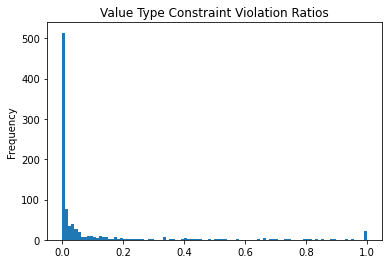

In [29]:
valTypeConstDF['violation_ratio'].plot.hist(bins=100).set_title("Value Type Constraint Violation Ratios")

Text(0.5, 1.0, 'Value Type Constraint Violation Ratios (<=0.04)')

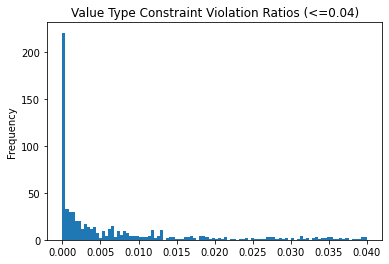

In [30]:
valTypeConstDF[valTypeConstDF['violation_ratio'] <= 0.04].violation_ratio.plot.hist(bins=100).set_title("Value Type Constraint Violation Ratios (<=0.04)")

In [31]:
print(f"No. of constraints whose violation ratio is greater than mean :{sum(valTypeConstDF['violation_ratio'] >= 3.950680)}/{len(valTypeConstDF)}")

No. of constraints whose violation ratio is greater than mean :0/897


In [32]:
# valTypeConstDF.sort_values(by=['violation_ratio'],ascending=False).head().paths.values

In [33]:
# !head ../../allConstraintsAnalysis_Final/typeConstraint/normal/claims.type-constraints.instanceOf.P7535.incorrect.tsv

In [34]:
for key1 in valueTypeConstViolations.keys():
    valueTypeConstViolations[key1]['correct'] = valueTypeConstViolations[key1]['instanceOf']['correct'] + valueTypeConstViolations[key1]['subclass']['correct'] + valueTypeConstViolations[key1]['instanceOfOrSubclass']['correct']
    valueTypeConstViolations[key1]['incorrect'] = valueTypeConstViolations[key1]['instanceOf']['incorrect'] + valueTypeConstViolations[key1]['subclass']['incorrect'] + valueTypeConstViolations[key1]['instanceOfOrSubclass']['incorrect']
    valueTypeConstViolations[key1]['VR'] = valueTypeConstViolations[key1]['incorrect'] / (valueTypeConstViolations[key1]['correct'] + valueTypeConstViolations[key1]['incorrect'])
        

In [35]:
valueTypeConstViolations

{'mandatory': {'instanceOf': {'correct': 11391695, 'incorrect': 3339},
  'subclass': {'correct': 44764, 'incorrect': 1},
  'instanceOfOrSubclass': {'correct': 11638, 'incorrect': 35},
  'propCount': 106,
  'correct': 11448097,
  'incorrect': 3375,
  'VR': 0.00029472193618427394},
 'suggestion': {'instanceOf': {'correct': 46036, 'incorrect': 474},
  'subclass': {'correct': 118, 'incorrect': 18},
  'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0},
  'propCount': 5,
  'correct': 46154,
  'incorrect': 492,
  'VR': 0.01054752819105604},
 'normal': {'instanceOf': {'correct': 88858176, 'incorrect': 689971},
  'subclass': {'correct': 4373665, 'incorrect': 6190},
  'instanceOfOrSubclass': {'correct': 76234047, 'incorrect': 163783},
  'propCount': 786,
  'correct': 169465888,
  'incorrect': 859944,
  'VR': 0.00504881725750208}}

In [36]:
valTypeConstDF.to_csv('../../allConstraintsAnalysis_Final/valueTypeConstDFAnalysis.csv')

### Find out time required

In [35]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplit_Final/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("valueTypeConstraintValidator_xverify3"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/313 [00:00<?, ?it/s]

In [79]:
print(pd.Series(times).describe())

count     897.000000
mean       41.756467
std       133.639231
min         1.516000
25%         3.236000
50%         6.851000
75%        24.280000
max      1683.328000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for value type constraint checks')

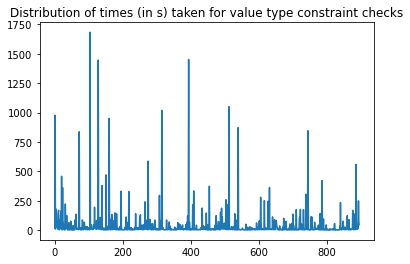

In [80]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for value type constraint checks")

## Item Requires Statement Constraint

### Understand Constraints File

In [1]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/itemRequiresConstraint/claims.type-constraints_all.tsv',sep='\t')

In [2]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [3]:
dfItemRequires['label'].unique()

array(['P2306', 'P2305', 'P2316', 'P2304', 'P2303', 'P6607', 'P4155',
       'P31', 'P2916', 'P4680', 'P2308'], dtype=object)

In [4]:
dfItemRequires['label'].value_counts()

P2306    7182
P2305    2540
P2316    2523
P2303     422
P2304      14
P6607      14
P2916       5
P4680       2
P4155       1
P2308       1
P31         1
Name: label, dtype: int64

In [5]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [6]:
dfItemRequires.head()

label                                  P2303 P2304   P2305   P2306 P2308  \
node1 id                                                                   
P1006 P1006-P2302-Q21503247-0451ef47-0   NaN   NaN     NaN  [P214]   NaN   
P1010 P1010-P2302-Q21503247-56183614-0   NaN   NaN     NaN   [P31]   NaN   
      P1010-P2302-Q21503247-fd256eaf-0   NaN   NaN  [Q794]   [P17]   NaN   
P1015 P1015-P2302-Q21503247-20e3bfc5-0   NaN   NaN     NaN   [P31]   NaN   
P1017 P1017-P2302-Q21503247-bbac2ce3-0   NaN   NaN     NaN  [P214]   NaN   

label                                         P2316 P2916  P31 P4155 P4680  \
node1 id                                                                     
P1006 P1006-P2302-Q21503247-0451ef47-0          NaN   NaN  NaN   NaN   NaN   
P1010 P1010-P2302-Q21503247-56183614-0          NaN   NaN  NaN   NaN   NaN   
      P1010-P2302-Q21503247-fd256eaf-0  [Q21502408]   NaN  NaN   NaN   NaN   
P1015 P1015-P2302-Q21503247-20e3bfc5-0          NaN   NaN  NaN   NaN   NaN   
P1017 P1017-P2302-Q21503247-bbac2ce3-0          NaN   NaN  NaN   NaN   NaN   

label                                  P6607  
node1 id                                      
P1006 P1006-P2302-Q21503247-0451ef47-0   NaN  
P1010 P1010-P2302-Q21503247-56183614-0   NaN  
      P1010-P2302-Q21503247-fd256eaf-0   NaN  
P1015 P1015-P2302-Q21503247-20e3bfc5-0   NaN  
P1017 P1017-P2302-Q21503247-bbac2ce3-0   NaN

In [7]:
dfItemRequires = dfItemRequires.droplevel(1)

In [8]:
dfItemRequires.head()

label P2303 P2304   P2305   P2306 P2308        P2316 P2916  P31 P4155 P4680  \
node1                                                                         
P1006   NaN   NaN     NaN  [P214]   NaN          NaN   NaN  NaN   NaN   NaN   
P1010   NaN   NaN     NaN   [P31]   NaN          NaN   NaN  NaN   NaN   NaN   
P1010   NaN   NaN  [Q794]   [P17]   NaN  [Q21502408]   NaN  NaN   NaN   NaN   
P1015   NaN   NaN     NaN   [P31]   NaN          NaN   NaN  NaN   NaN   NaN   
P1017   NaN   NaN     NaN  [P214]   NaN          NaN   NaN  NaN   NaN   NaN   

label P6607  
node1        
P1006   NaN  
P1010   NaN  
P1010   NaN  
P1015   NaN  
P1017   NaN

However, there is one anomaly where the property does not have a co-dependency constraint associated with it, but still has a link to this constraint.

In [9]:
dfItemRequires[dfItemRequires['P4680'].apply(lambda p: type(p) == list)]

label P2303 P2304        P2305    P2306 P2308 P2316 P2916  P31 P4155  \
node1                                                                  
P5447   NaN   NaN  [Q55426051]  [P5446]   NaN   NaN   NaN  NaN   NaN   
P5448   NaN   NaN  [Q55426051]  [P5446]   NaN   NaN   NaN  NaN   NaN   

label        P4680 P6607  
node1                     
P5447  [Q46466783]   NaN  
P5448  [Q46466783]   NaN

In [10]:
dfItemRequires[dfItemRequires['P2305'].apply(lambda p: type(p) == list)]

label              P2303 P2304                             P2305   P2306  \
node1                                                                      
P1010                NaN   NaN                            [Q794]   [P17]   
P1045                NaN   NaN  [Q20808382, Q28218485, Q3044918]   [P39]   
P1045                NaN   NaN                          [Q82955]  [P106]   
P1045                NaN   NaN                              [Q5]   [P31]   
P1045                NaN   NaN                    [Q142, Q71084]   [P27]   
...                  ...   ...                               ...     ...   
P980                 NaN   NaN                             [Q34]   [P17]   
P981                 NaN   NaN                             [Q55]   [P17]   
P981                 NaN   NaN                        [Q1852859]   [P31]   
P988                 NaN   NaN                            [Q928]   [P17]   
P990   [Q49678, Q853715]   NaN                              [Q5]   [P31]   

label P2308        P2316 P2916  P31 P4155 P4680 P6607  
node1                                                  
P1010   NaN  [Q21502408]   NaN  NaN   NaN   NaN   NaN  
P1045   NaN          NaN   NaN  NaN   NaN   NaN   NaN  
P1045   NaN          NaN   NaN  NaN   NaN   NaN   NaN  
P1045   NaN  [Q21502408]   NaN  NaN   NaN   NaN   NaN  
P1045   NaN          NaN   NaN  NaN   NaN   NaN   NaN  
...     ...          ...   ...  ...   ...   ...   ...  
P980    NaN  [Q21502408]   NaN  NaN   NaN   NaN   NaN  
P981    NaN  [Q21502408]   NaN  NaN   NaN   NaN   NaN  
P981    NaN          NaN   NaN  NaN   NaN   NaN   NaN  
P988    NaN  [Q21502408]   NaN  NaN   NaN   NaN   NaN  
P990    NaN          NaN   NaN  NaN   NaN   NaN   NaN  

[2540 rows x 11 columns]

### Query Generator

#### Version 1 - Mandatory + Suggestion + Normal

In [138]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

fOP = None

folderName = 'codependencyConstraint'
subFolderName = "Mand_Sugg_Normal"
shellFileSuffix = 'codepConst_MSN_Validator'
graph_cache_file_prefix = "cache_new_1_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit_Final/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory + suggestion + normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit_Final/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit_Final/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 60 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit_Final/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv "
            
            commandOPFile = "-o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv "
            
            commandOPFile = "-o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit_Final/claims.P345.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2604.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1566.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1566.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2355.tsv does not exist
File: ../../propertiesSplit_Final/claims.P3350.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1014.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2636.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1771.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2755.tsv does not exist
File: ../../propertiesSplit_Final/claims.P8326.tsv does not exist
File: ../../propertiesSplit_Final/claims.P5128.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1627.tsv does not exist
File: ../../propertiesSplit_Final/claims.P954.tsv does not exist
File: ../../propertiesSplit_Final/claims.P498.tsv does not exist
File: ../../p

In [139]:
cnt

527

In [140]:
fCnt

9

In [123]:
# from tqdm.notebook import tqdm
# import os.path
# import os
# folderName = 'codependencyConstraint'
# for prop in tqdm(dfItemRequires.index.unique()):
#     for subFolderName in ['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal']:
#         if os.path.isfile("../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv") and \
#             os.path.isfile("../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv"):
#                 os.system("kgtk cat -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
#                     ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
#                     -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_w_exceptions.tsv")

In [141]:
# import os
# for i in range(1,28):
#     os.system("screen -dm sh ../../propertiesSplit_Final/checkViolations/codepConst_MSN_Validator"+str(i)+".sh")

#### Version 2 - Mandatory + Normal

In [142]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

fOP = None

folderName = 'codependencyConstraint'
subFolderName = "Mand_Normal"
shellFileSuffix = 'codepConst_MN_Validator'
graph_cache_file_prefix = "cache_new_2_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit_Final/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory + normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit_Final/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit_Final/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 60 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit_Final/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv "
            
            commandOPFile = "-o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv "
            
            commandOPFile = "-o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit_Final/claims.P345.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2604.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1566.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2355.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1014.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2636.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1771.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2755.tsv does not exist
File: ../../propertiesSplit_Final/claims.P8326.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1627.tsv does not exist
File: ../../propertiesSplit_Final/claims.P954.tsv does not exist
File: ../../propertiesSplit_Final/claims.P498.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1297.tsv does not exist
File: ../../propertiesSplit_Final/claims.P8680.tsv does not exist
File: ../../propertiesSplit_Final/claims.P715.tsv does not exist
File: ../../pr

In [143]:
cnt

468

In [144]:
# import os
# for i in range(1,25):
#     os.system("screen -dm sh ../../propertiesSplit_Final/checkViolations/codepConst_MN_Validator"+str(i)+".sh")

#### Version 3 - Mandatory

In [145]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint'
subFolderName = "Mand"
shellFileSuffix = 'codepConst_M_Validator'
graph_cache_file_prefix = "cache_3_new_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit_Final/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit_Final/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit_Final/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 60 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit_Final/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv "
            
            commandOPFile = "-o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv "
            
            commandOPFile = "-o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit_Final/claims.P1627.tsv does not exist


In [146]:
cnt

78

In [147]:
# import os
# for i in range(1,5):
#     os.system("screen -dm sh ../../propertiesSplit_Final/checkViolations/codepConst_M_Validator"+str(i)+".sh")

#### Version 4 - Normal

In [148]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

fOP = None

folderName = 'codependencyConstraint'
subFolderName = "Normal"
shellFileSuffix = 'codepConst_N_Validator'
graph_cache_file_prefix = "cache_4_new_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit_Final/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit_Final/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit_Final/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 60 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit_Final/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv "
            
            commandOPFile = "-o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv "
            
            commandOPFile = "-o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv\
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit_Final/claims.P345.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2604.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1566.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2355.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1014.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2636.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1771.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2755.tsv does not exist
File: ../../propertiesSplit_Final/claims.P8326.tsv does not exist
File: ../../propertiesSplit_Final/claims.P954.tsv does not exist
File: ../../propertiesSplit_Final/claims.P498.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1297.tsv does not exist
File: ../../propertiesSplit_Final/claims.P8680.tsv does not exist
File: ../../propertiesSplit_Final/claims.P715.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2606.tsv does not exist
File: ../../pr

In [149]:
cnt

418

In [150]:
# import os
# for i in range(1,23):
#     os.system("screen -dm sh ../../propertiesSplit_Final/checkViolations/codepConst_N_Validator"+str(i)+".sh")

#### Version 5 - Suggestion

In [151]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint'
subFolderName = "Suggestion"
shellFileSuffix = 'codepConst_S_Validator'
graph_cache_file_prefix = "codep_new_6_1_"

fOP = None

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit_Final/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = suggestion
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit_Final/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit_Final/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 60 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit_Final/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv "
            
            commandOPFile = "-o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv "
            
            commandOPFile = "-o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit_Final/claims.P1566.tsv does not exist
File: ../../propertiesSplit_Final/claims.P3350.tsv does not exist
File: ../../propertiesSplit_Final/claims.P5128.tsv does not exist


In [152]:
cnt

97

In [153]:
# import os
# for i in range(1,6):
#     os.system("screen -dm sh ../../propertiesSplit_Final/checkViolations/codepConst_S_Validator"+str(i)+".sh")

### Analyze Violations

In [11]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

codepConstViolations = {}
codepConstPropList = set()

# codepConstViolationsSummary = {}

for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal','Suggestion'])):
    filePath = "../../allConstraintsAnalysis_Final/codependencyConstraint/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        prop = filename.split(".")[1]
        correctness = filename.split(".")[2]
        if correctness not in ['correct','incorrect']:
            continue
        codepConstPropList.add(prop)
        count1 = countLines(filePath+filename)
        if folder not in codepConstViolations:
            codepConstViolations[folder] = {}
        if prop not in codepConstViolations[folder]:
            codepConstViolations[folder][prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        codepConstViolations[folder][prop][correctness] = count1
        codepConstViolations[folder][prop]['paths'].append(filePath+filename)
        
#         if folder not in codepConstViolationsSummary:
#             codepConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
#         codepConstViolationsSummary[folder][correctness] += count1

0it [00:00, ?it/s]

  0%|          | 0/1192 [00:00<?, ?it/s]

  0%|          | 0/1053 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/953 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

In [12]:
codepConstViolationsSummary = {}
for folder in codepConstViolations.keys():
    for prop in codepConstViolations[folder].keys():
        if folder not in codepConstViolationsSummary:
            codepConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0, 'propCount': 0}
        codepConstViolationsSummary[folder]['correct'] += codepConstViolations[folder][prop]['correct']
        codepConstViolationsSummary[folder]['incorrect'] += codepConstViolations[folder][prop]['incorrect']
        codepConstViolationsSummary[folder]['propCount'] += 1

In [13]:
for elem in codepConstViolationsSummary.keys():
    codepConstViolationsSummary[elem]['total'] = codepConstViolationsSummary[elem]['correct'] + codepConstViolationsSummary[elem]['incorrect']
    codepConstViolationsSummary[elem]['percIncorrect'] = codepConstViolationsSummary[elem]['incorrect'] / codepConstViolationsSummary[elem]['total'] * 100

In [14]:
codepConstViolationsSummary

{'Mand_Sugg_Normal': {'correct': 298173993,
  'incorrect': 4468153,
  'propCount': 527,
  'total': 302642146,
  'percIncorrect': 1.47638161407962},
 'Mand_Normal': {'correct': 273602683,
  'incorrect': 2248323,
  'propCount': 468,
  'total': 275851006,
  'percIncorrect': 0.815049773644835},
 'Mand': {'correct': 3984740,
  'incorrect': 767,
  'propCount': 78,
  'total': 3985507,
  'percIncorrect': 0.019244728462401398},
 'Normal': {'correct': 272710532,
  'incorrect': 2247659,
  'propCount': 418,
  'total': 274958191,
  'percIncorrect': 0.8174548253410643},
 'Suggestion': {'correct': 25729758,
  'incorrect': 2240178,
  'propCount': 97,
  'total': 27969936,
  'percIncorrect': 8.009235344692959}}

In [15]:
mandatoryPropCount = 0
suggestionPropCount = 0
normalPropCount = 0
for prop in tqdm(dfItemRequires.index.unique()):
    if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop +".tsv")):
        continue
    prop = str(prop)
    hasMandatory = False
    hasSuggestion = False
    hasNormal = False

    for _, constraint in dfItemRequires.loc[[prop]].iterrows():
        prop2 = constraint['P2306']
            
        if type(prop2) != list:
            continue
        prop2 = prop2[0]

        if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop2 +".tsv")):
            print(f"File: ../../propertiesSplit_Final/claims.{prop2}.tsv does not exist")
            continue
            
        if type(constraint['P2316']) == list:
            if constraint['P2316'][0] == 'Q21502408':
                hasMandatory = True
            elif constraint['P2316'][0] == 'Q62026391':
                hasSuggestion = True
        else:
            hasNormal = True
    if hasMandatory:
        mandatoryPropCount += 1
    if hasSuggestion:
        suggestionPropCount += 1
    if hasNormal:
        normalPropCount += 1

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit_Final/claims.P345.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2604.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1566.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1566.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2355.tsv does not exist
File: ../../propertiesSplit_Final/claims.P3350.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1014.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2636.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1771.tsv does not exist
File: ../../propertiesSplit_Final/claims.P2755.tsv does not exist
File: ../../propertiesSplit_Final/claims.P8326.tsv does not exist
File: ../../propertiesSplit_Final/claims.P5128.tsv does not exist
File: ../../propertiesSplit_Final/claims.P1627.tsv does not exist
File: ../../propertiesSplit_Final/claims.P954.tsv does not exist
File: ../../propertiesSplit_Final/claims.P498.tsv does not exist
File: ../../p

In [16]:
print(f"No. of props having at least 1 mandatory constraint: {mandatoryPropCount}")
print(f"No. of props having at least 1 suggestion constraint: {suggestionPropCount}")
print(f"No. of props having at least 1 normal constraint: {normalPropCount}")

No. of props having at least 1 mandatory constraint: 76
No. of props having at least 1 suggestion constraint: 95
No. of props having at least 1 normal constraint: 408


#### Version 1 - Mand Sugg Normal

In [17]:
import pandas as pd
codepConstDF1 = pd.DataFrame(codepConstViolations['Mand_Sugg_Normal']).T

In [18]:
codepConstDF1

correct incorrect                                              paths
P2322     1207        65  [../../allConstraintsAnalysis_Final/codependen...
P2643    17086         0  [../../allConstraintsAnalysis_Final/codependen...
P119    176018      2477  [../../allConstraintsAnalysis_Final/codependen...
P1629     7531        88  [../../allConstraintsAnalysis_Final/codependen...
P3610     3519        64  [../../allConstraintsAnalysis_Final/codependen...
...        ...       ...                                                ...
P19    2637114     24855  [../../allConstraintsAnalysis_Final/codependen...
P2873      642         8  [../../allConstraintsAnalysis_Final/codependen...
P2875     3547        16  [../../allConstraintsAnalysis_Final/codependen...
P2876       51        14  [../../allConstraintsAnalysis_Final/codependen...
P2900    21844       813  [../../allConstraintsAnalysis_Final/codependen...

[527 rows x 3 columns]

In [19]:
codepConstDF1['violation_ratio'] = codepConstDF1.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)

In [20]:
codepConstDF1.sort_values(by=['violation_ratio', 'incorrect'],ascending=False).head(15)

correct incorrect                                              paths  \
P1111       0     46327  [../../allConstraintsAnalysis_Final/codependen...   
P2302       0     42211  [../../allConstraintsAnalysis_Final/codependen...   
P3063       0       549  [../../allConstraintsAnalysis_Final/codependen...   
P2303       0        39  [../../allConstraintsAnalysis_Final/codependen...   
P5447       0        23  [../../allConstraintsAnalysis_Final/codependen...   
P5448       0        23  [../../allConstraintsAnalysis_Final/codependen...   
P2308       0        17  [../../allConstraintsAnalysis_Final/codependen...   
P7569       0         8  [../../allConstraintsAnalysis_Final/codependen...   
P7903       0         7  [../../allConstraintsAnalysis_Final/codependen...   
P574        0         4  [../../allConstraintsAnalysis_Final/codependen...   
P2306       0         3  [../../allConstraintsAnalysis_Final/codependen...   
P2916       0         1  [../../allConstraintsAnalysis_Final/codependen...   
P8264       0         1  [../../allConstraintsAnalysis_Final/codependen...   
P2433       0         1  [../../allConstraintsAnalysis_Final/codependen...   
P2307       0         1  [../../allConstraintsAnalysis_Final/codependen...   

       violation_ratio  
P1111              1.0  
P2302              1.0  
P3063              1.0  
P2303              1.0  
P5447              1.0  
P5448              1.0  
P2308              1.0  
P7569              1.0  
P7903              1.0  
P574               1.0  
P2306              1.0  
P2916              1.0  
P8264              1.0  
P2433              1.0  
P2307              1.0

In [21]:
list(codepConstDF1.loc['P2302']['paths'])

['../../allConstraintsAnalysis_Final/codependencyConstraint/Mand_Sugg_Normal/claims.P2302.correct.tsv',
 '../../allConstraintsAnalysis_Final/codependencyConstraint/Mand_Sugg_Normal/claims.P2302.incorrect.tsv']

In [22]:
!head ../../allConstraintsAnalysis_Final/codependencyConstraint_Final/Mand_Sugg_Normal/claims.P2302.incorrect.tsv

head: cannot open ‘../../allConstraintsAnalysis_Final/codependencyConstraint_Final/Mand_Sugg_Normal/claims.P2302.incorrect.tsv’ for reading: No such file or directory


In [23]:
codepConstDF1.sort_values(by=['incorrect'],ascending=False).head(15)

correct incorrect                                              paths  \
P2214    2962988    711699  [../../allConstraintsAnalysis_Final/codependen...   
P734     2001246    704728  [../../allConstraintsAnalysis_Final/codependen...   
P433    31028893    435543  [../../allConstraintsAnalysis_Final/codependen...   
P195     1132062    384602  [../../allConstraintsAnalysis_Final/codependen...   
P569     4646728    241105  [../../allConstraintsAnalysis_Final/codependen...   
P131    10056935    198870  [../../allConstraintsAnalysis_Final/codependen...   
P275        5955    123578  [../../allConstraintsAnalysis_Final/codependen...   
P2860  174402886    114713  [../../allConstraintsAnalysis_Final/codependen...   
P2017      84792    101300  [../../allConstraintsAnalysis_Final/codependen...   
P570     2332611     94455  [../../allConstraintsAnalysis_Final/codependen...   
P1435    1893874     79479  [../../allConstraintsAnalysis_Final/codependen...   
P1922      30451     63926  [../../allConstraintsAnalysis_Final/codependen...   
P708       45253     54258  [../../allConstraintsAnalysis_Final/codependen...   
P197      117522     49904  [../../allConstraintsAnalysis_Final/codependen...   
P1598      36544     46915  [../../allConstraintsAnalysis_Final/codependen...   

       violation_ratio  
P2214         0.193676  
P734          0.260434  
P433          0.013842  
P195          0.253584  
P569          0.049328  
P131          0.019391  
P275          0.954027  
P2860         0.000657  
P2017         0.544354  
P570          0.038917  
P1435         0.040276  
P1922         0.677347  
P708          0.545246  
P197          0.298066  
P1598         0.562132

In [24]:
codepConstDF1['violation_ratio'].describe()

count    527.000000
mean       0.209456
std        0.306132
min        0.000000
25%        0.001024
50%        0.037037
75%        0.300012
max        1.000000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 1 - Violation Ratios')

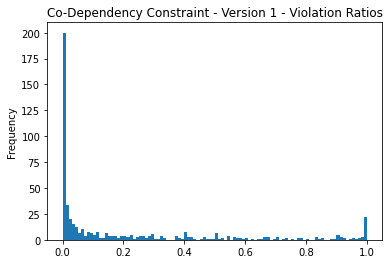

In [25]:
codepConstDF1['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 1 - Violation Ratios")

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 1 - Violation Ratios <= 0.5')

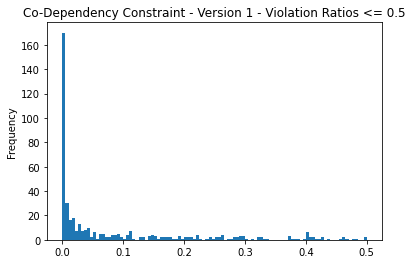

In [26]:
codepConstDF1[codepConstDF1['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 1 - Violation Ratios <= 0.5")

In [27]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF1['violation_ratio'] >= 3.539484)}/{len(codepConstDF1)}")

No. of properties whose violation ratio is greater than mean: 0/527


In [28]:
codepConstDF1.to_csv('../../allConstraintsAnalysis_Final/codepConstDFAnalysis.csv')

#### Version 2 - Mand Normal

In [29]:
import pandas as pd
codepConstDF2 = pd.DataFrame(codepConstViolations['Mand_Normal']).T

In [30]:
codepConstDF2

correct incorrect                                              paths
P1196   85037      3039  [../../allConstraintsAnalysis_Final/codependen...
P2429    2228       236  [../../allConstraintsAnalysis_Final/codependen...
P1843  575709     14889  [../../allConstraintsAnalysis_Final/codependen...
P2668     168         0  [../../allConstraintsAnalysis_Final/codependen...
P1383   31726        41  [../../allConstraintsAnalysis_Final/codependen...
...       ...       ...                                                ...
P3816      17         7  [../../allConstraintsAnalysis_Final/codependen...
P3823    7376         0  [../../allConstraintsAnalysis_Final/codependen...
P3834    2070         0  [../../allConstraintsAnalysis_Final/codependen...
P3842    9338       338  [../../allConstraintsAnalysis_Final/codependen...
P3858    3336       106  [../../allConstraintsAnalysis_Final/codependen...

[468 rows x 3 columns]

In [31]:
codepConstDF2['violation_ratio'] = codepConstDF2.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)

In [32]:
codepConstDF2.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P7903       0         7  [../../allConstraintsAnalysis_Final/codependen...   
P2308       0        17  [../../allConstraintsAnalysis_Final/codependen...   
P2916       0         1  [../../allConstraintsAnalysis_Final/codependen...   
P2433       0         1  [../../allConstraintsAnalysis_Final/codependen...   
P8264       0         1  [../../allConstraintsAnalysis_Final/codependen...   
P2309       0         1  [../../allConstraintsAnalysis_Final/codependen...   
P5447       0        23  [../../allConstraintsAnalysis_Final/codependen...   
P5448       0        23  [../../allConstraintsAnalysis_Final/codependen...   
P2307       0         1  [../../allConstraintsAnalysis_Final/codependen...   
P1111       0     46327  [../../allConstraintsAnalysis_Final/codependen...   
P7569       0         8  [../../allConstraintsAnalysis_Final/codependen...   
P574        0         4  [../../allConstraintsAnalysis_Final/codependen...   
P2306       0         3  [../../allConstraintsAnalysis_Final/codependen...   
P2313       0         1  [../../allConstraintsAnalysis_Final/codependen...   
P2303       0        39  [../../allConstraintsAnalysis_Final/codependen...   

       violation_ratio  
P7903              1.0  
P2308              1.0  
P2916              1.0  
P2433              1.0  
P8264              1.0  
P2309              1.0  
P5447              1.0  
P5448              1.0  
P2307              1.0  
P1111              1.0  
P7569              1.0  
P574               1.0  
P2306              1.0  
P2313              1.0  
P2303              1.0

In [33]:
codepConstDF2.sort_values(by=['incorrect'],ascending=False).head(15)

correct incorrect                                              paths  \
P2214    2962988    711699  [../../allConstraintsAnalysis_Final/codependen...   
P433    31028893    435543  [../../allConstraintsAnalysis_Final/codependen...   
P275        5955    123578  [../../allConstraintsAnalysis_Final/codependen...   
P2860  174402886    114713  [../../allConstraintsAnalysis_Final/codependen...   
P1435    1893874     79479  [../../allConstraintsAnalysis_Final/codependen...   
P708       45253     54258  [../../allConstraintsAnalysis_Final/codependen...   
P197      117522     49904  [../../allConstraintsAnalysis_Final/codependen...   
P1598      36978     46481  [../../allConstraintsAnalysis_Final/codependen...   
P1111          0     46327  [../../allConstraintsAnalysis_Final/codependen...   
P2248       4020     41566  [../../allConstraintsAnalysis_Final/codependen...   
P2325       4071     40611  [../../allConstraintsAnalysis_Final/codependen...   
P856     1239292     38107  [../../allConstraintsAnalysis_Final/codependen...   
P2243       4025     36540  [../../allConstraintsAnalysis_Final/codependen...   
P2244       4027     36527  [../../allConstraintsAnalysis_Final/codependen...   
P413      357793     33607  [../../allConstraintsAnalysis_Final/codependen...   

       violation_ratio  
P2214         0.193676  
P433          0.013842  
P275          0.954027  
P2860         0.000657  
P1435         0.040276  
P708          0.545246  
P197          0.298066  
P1598         0.556932  
P1111         1.000000  
P2248         0.911815  
P2325         0.908889  
P856          0.029832  
P2243         0.900777  
P2244         0.900700  
P413          0.085864

In [34]:
codepConstDF2['violation_ratio'].describe()

count    468.000000
mean       0.171527
std        0.285675
min        0.000000
25%        0.000690
50%        0.017889
75%        0.208292
max        1.000000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 2 - Violation Ratios')

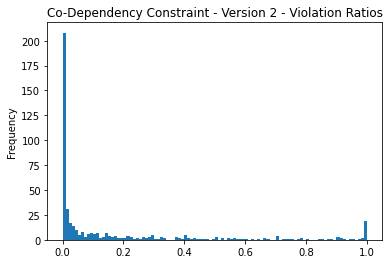

In [35]:
codepConstDF2['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 2 - Violation Ratios")

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 2 - Violation Ratios <= 0.5')

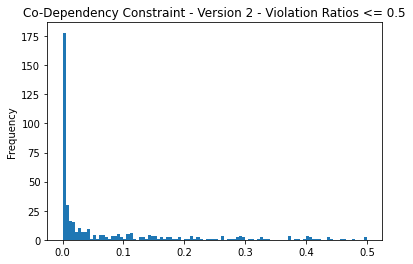

In [36]:
codepConstDF2[codepConstDF2['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 2 - Violation Ratios <= 0.5")

In [37]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF2['violation_ratio'] >= 2.290915)}/{len(codepConstDF2)}")

No. of properties whose violation ratio is greater than mean: 0/468


#### Version 3 - Mand

In [38]:
import pandas as pd
codepConstDF3 = pd.DataFrame(codepConstViolations['Mand']).T

In [39]:
codepConstDF3

correct incorrect                                              paths
P2021    2303         1  [../../allConstraintsAnalysis_Final/codependen...
P3744     311         0  [../../allConstraintsAnalysis_Final/codependen...
P5982    1326         0  [../../allConstraintsAnalysis_Final/codependen...
P1081   12300         0  [../../allConstraintsAnalysis_Final/codependen...
P2095      38         3  [../../allConstraintsAnalysis_Final/codependen...
...       ...       ...                                                ...
P517      240         0  [../../allConstraintsAnalysis_Final/codependen...
P521     1717         1  [../../allConstraintsAnalysis_Final/codependen...
P555     3876         1  [../../allConstraintsAnalysis_Final/codependen...
P5623    1472         0  [../../allConstraintsAnalysis_Final/codependen...
P564     3899         2  [../../allConstraintsAnalysis_Final/codependen...

[78 rows x 3 columns]

In [40]:
codepConstDF3['violation_ratio'] = codepConstDF3.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)

In [41]:
codepConstDF3.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P5051       1        63  [../../allConstraintsAnalysis_Final/codependen...   
P4341       7         1  [../../allConstraintsAnalysis_Final/codependen...   
P2095      38         3  [../../allConstraintsAnalysis_Final/codependen...   
P990      966        41  [../../allConstraintsAnalysis_Final/codependen...   
P3931    2250        64  [../../allConstraintsAnalysis_Final/codependen...   
P1731     363         9  [../../allConstraintsAnalysis_Final/codependen...   
P2009    1019        15  [../../allConstraintsAnalysis_Final/codependen...   
P246      169         2  [../../allConstraintsAnalysis_Final/codependen...   
P8264       0         1  [../../allConstraintsAnalysis_Final/codependen...   
P1635     890         7  [../../allConstraintsAnalysis_Final/codependen...   
P944      577         4  [../../allConstraintsAnalysis_Final/codependen...   
P1560    3235        20  [../../allConstraintsAnalysis_Final/codependen...   
P2679     887         5  [../../allConstraintsAnalysis_Final/codependen...   
P451    10502        36  [../../allConstraintsAnalysis_Final/codependen...   
P2365    1650         5  [../../allConstraintsAnalysis_Final/codependen...   

       violation_ratio  
P5051        63.000000  
P4341         0.142857  
P2095         0.078947  
P990          0.042443  
P3931         0.028444  
P1731         0.024793  
P2009         0.014720  
P246          0.011834  
P8264         0.010000  
P1635         0.007865  
P944          0.006932  
P1560         0.006182  
P2679         0.005637  
P451          0.003428  
P2365         0.003030

In [42]:
codepConstDF3.loc['P1713']

correct                                                         1980
incorrect                                                          1
paths              [../../allConstraintsAnalysis_Final/codependen...
violation_ratio                                             0.000505
Name: P1713, dtype: object

In [43]:
!head ../../allConstraintsAnalysis_Final/codependencyConstraint_Final/Mand/claims.P1713.incorrect.tsv

head: cannot open ‘../../allConstraintsAnalysis_Final/codependencyConstraint_Final/Mand/claims.P1713.incorrect.tsv’ for reading: No such file or directory


In [44]:
!cat ../../allConstraintsAnalysis_Final/codependencyConstraint/Mand/claims.P1713.incorrect.tsv

id	node1	label	node2	rank	node2;wikidatatype
Q4681882-P1713-d878eb-9fff460e-0	Q4681882	P1713	"https://heightnetworth.com/adele-givens-net-worth-2020/"	normal	url


In [45]:
codepConstDF3.sort_values(by=['incorrect'],ascending=False).head(15)

correct incorrect                                              paths  \
P7959  655743       376  [../../allConstraintsAnalysis_Final/codependen...   
P3931    2250        64  [../../allConstraintsAnalysis_Final/codependen...   
P5051       1        63  [../../allConstraintsAnalysis_Final/codependen...   
P915    28364        45  [../../allConstraintsAnalysis_Final/codependen...   
P990      966        41  [../../allConstraintsAnalysis_Final/codependen...   
P451    10502        36  [../../allConstraintsAnalysis_Final/codependen...   
P197   167392        34  [../../allConstraintsAnalysis_Final/codependen...   
P1560    3235        20  [../../allConstraintsAnalysis_Final/codependen...   
P2009    1019        15  [../../allConstraintsAnalysis_Final/codependen...   
P1731     363         9  [../../allConstraintsAnalysis_Final/codependen...   
P1635     890         7  [../../allConstraintsAnalysis_Final/codependen...   
P1196   88070         6  [../../allConstraintsAnalysis_Final/codependen...   
P2679     887         5  [../../allConstraintsAnalysis_Final/codependen...   
P2365    1650         5  [../../allConstraintsAnalysis_Final/codependen...   
P141   121709         4  [../../allConstraintsAnalysis_Final/codependen...   

       violation_ratio  
P7959         0.000573  
P3931         0.028444  
P5051        63.000000  
P915          0.001587  
P990          0.042443  
P451          0.003428  
P197          0.000203  
P1560         0.006182  
P2009         0.014720  
P1731         0.024793  
P1635         0.007865  
P1196         0.000068  
P2679         0.005637  
P2365         0.003030  
P141          0.000033

In [46]:
codepConstDF3['violation_ratio'].describe()

count    78.000000
mean      0.812773
std       7.132789
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000641
max      63.000000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 3 - Violation Ratios')

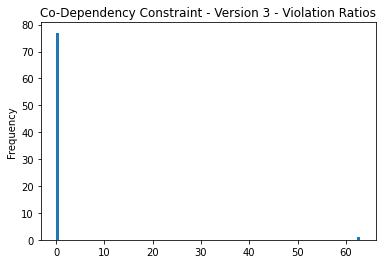

In [47]:
codepConstDF3['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 3 - Violation Ratios")

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 3 - Violation Ratios <= 0.0005')

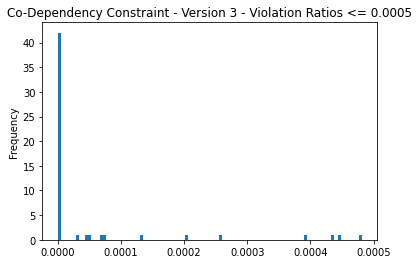

In [48]:
codepConstDF3[codepConstDF3['violation_ratio'] <= 0.0005].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 3 - Violation Ratios <= 0.0005")

In [49]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF3['violation_ratio'] >= 0.922928)}/{len(codepConstDF3)}")

No. of properties whose violation ratio is greater than mean: 1/78


#### Version 4 - Normal

In [50]:
import pandas as pd
codepConstDF4 = pd.DataFrame(codepConstViolations['Normal']).T

In [51]:
codepConstDF4

correct incorrect                                              paths
P3880    242457       460  [../../allConstraintsAnalysis_Final/codependen...
P7080       212         0  [../../allConstraintsAnalysis_Final/codependen...
P1540    236379       456  [../../allConstraintsAnalysis_Final/codependen...
P4341         8         0  [../../allConstraintsAnalysis_Final/codependen...
P5012        81        10  [../../allConstraintsAnalysis_Final/codependen...
...         ...       ...                                                ...
P4213     42542        13  [../../allConstraintsAnalysis_Final/codependen...
P4238       258        11  [../../allConstraintsAnalysis_Final/codependen...
P427      27232        26  [../../allConstraintsAnalysis_Final/codependen...
P4316       183        72  [../../allConstraintsAnalysis_Final/codependen...
P433   31028893    435543  [../../allConstraintsAnalysis_Final/codependen...

[418 rows x 3 columns]

In [52]:
codepConstDF4['violation_ratio'] = codepConstDF4.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)

In [53]:
codepConstDF4.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P1111       0     46327  [../../allConstraintsAnalysis_Final/codependen...   
P1995      80      9985  [../../allConstraintsAnalysis_Final/codependen...   
P768      133     15143  [../../allConstraintsAnalysis_Final/codependen...   
P4501     419     22682  [../../allConstraintsAnalysis_Final/codependen...   
P2715       4       158  [../../allConstraintsAnalysis_Final/codependen...   
P275     5955    123578  [../../allConstraintsAnalysis_Final/codependen...   
P2376       1        19  [../../allConstraintsAnalysis_Final/codependen...   
P3912     297      3705  [../../allConstraintsAnalysis_Final/codependen...   
P2720      12       134  [../../allConstraintsAnalysis_Final/codependen...   
P2248    4020     41566  [../../allConstraintsAnalysis_Final/codependen...   
P2325    4071     40611  [../../allConstraintsAnalysis_Final/codependen...   
P2243    4025     36540  [../../allConstraintsAnalysis_Final/codependen...   
P2244    4027     36527  [../../allConstraintsAnalysis_Final/codependen...   
P3448     547      4302  [../../allConstraintsAnalysis_Final/codependen...   
P7707      65       445  [../../allConstraintsAnalysis_Final/codependen...   

       violation_ratio  
P1111       463.270000  
P1995       124.812500  
P768        113.857143  
P4501        54.133652  
P2715        39.500000  
P275         20.751973  
P2376        19.000000  
P3912        12.474747  
P2720        11.166667  
P2248        10.339801  
P2325         9.975682  
P2243         9.078261  
P2244         9.070524  
P3448         7.864717  
P7707         6.846154

In [54]:
# list(codepConstDF4.sort_values(by=['violation_ratio'],ascending=False).head(5).paths)

In [55]:
codepConstDF4.sort_values(by=['incorrect'],ascending=False).head(15)

correct incorrect                                              paths  \
P2214    2962988    711699  [../../allConstraintsAnalysis_Final/codependen...   
P433    31028893    435543  [../../allConstraintsAnalysis_Final/codependen...   
P275        5955    123578  [../../allConstraintsAnalysis_Final/codependen...   
P2860  174402886    114713  [../../allConstraintsAnalysis_Final/codependen...   
P1435    1893874     79479  [../../allConstraintsAnalysis_Final/codependen...   
P708       45253     54258  [../../allConstraintsAnalysis_Final/codependen...   
P197      117523     49903  [../../allConstraintsAnalysis_Final/codependen...   
P1598      36978     46481  [../../allConstraintsAnalysis_Final/codependen...   
P1111          0     46327  [../../allConstraintsAnalysis_Final/codependen...   
P2248       4020     41566  [../../allConstraintsAnalysis_Final/codependen...   
P2325       4071     40611  [../../allConstraintsAnalysis_Final/codependen...   
P856     1239292     38107  [../../allConstraintsAnalysis_Final/codependen...   
P2243       4025     36540  [../../allConstraintsAnalysis_Final/codependen...   
P2244       4027     36527  [../../allConstraintsAnalysis_Final/codependen...   
P413      357793     33607  [../../allConstraintsAnalysis_Final/codependen...   

       violation_ratio  
P2214         0.240196  
P433          0.014037  
P275         20.751973  
P2860         0.000658  
P1435         0.041966  
P708          1.198992  
P197          0.424623  
P1598         1.256991  
P1111       463.270000  
P2248        10.339801  
P2325         9.975682  
P856          0.030749  
P2243         9.078261  
P2244         9.070524  
P413          0.093929

In [56]:
codepConstDF4['violation_ratio'].describe()

count    418.000000
mean       2.454376
std       24.333809
min        0.000000
25%        0.001419
50%        0.026024
75%        0.237647
max      463.270000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 4 - Violation Ratios')

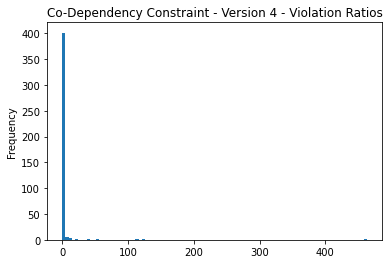

In [57]:
codepConstDF4['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 4 - Violation Ratios")

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 4 - Violation Ratios <= 0.5')

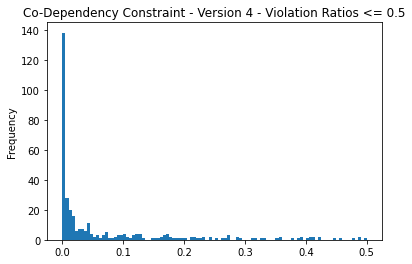

In [58]:
codepConstDF4[codepConstDF4['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 4 - Violation Ratios <= 0.5")

In [59]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF4['violation_ratio'] >= 2.414703)}/{len(codepConstDF4)}")

No. of properties whose violation ratio is greater than mean: 25/418


### Find out time required

In [ ]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
timesVersion = {"MSN": [], "MN": [], "M": [], "N": [], "S": []}
filePath = '/data/wd-correctness/propertiesSplit_Final/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("timeLog_codepConst_"):
        ver = filename.split('_')[2]
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes
        timesVersion[ver] += tempTimes
print(pd.Series(times).describe())

In [ ]:
print(pd.Series(timesVersion['MSN']).describe())

In [ ]:
print(pd.Series(timesVersion['MN']).describe())

In [ ]:
print(pd.Series(timesVersion['M']).describe())

In [ ]:
print(pd.Series(timesVersion['N']).describe())

## Symmetric Constraint (Q21510862)

This constraint says, if node1 has a property with this constraint, then both `(node1)-[prop]->(node2)` and `(node2)-[prop]->(node1)` must be present with few exceptions

### Constraints File

In [154]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz \
    ../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz \
    --match "p: (nodeProp1)-[nodePropEdge:P2302]->(:Q21510862)" \
    -o ../../constraintsOP/symmetricConstraint/claims.constraints_list.tsv \
    --graph-cache ~/sqlite3_caches/temp1345.valuetype.sqlite3.db

[2021-04-15 03:24:06 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     WHERE graph_1_c1."label"=?
     AND graph_1_c1."node2"=?
  PARAS: ['P2302', 'Q21510862']
---------------------------------------------


In [155]:
import pandas as pd
qualiDF = pd.read_csv("../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz",sep='\t')
constDF = pd.read_csv("../../constraintsOP/symmetricConstraint/claims.constraints_list.tsv",sep='\t')

In [156]:
constDF2 = constDF.set_index('id').join(qualiDF.set_index('node1'),rsuffix='_qualifier').drop(columns=['id', 'node2;wikidatatype_qualifier', 'rank', 'node2', 'label', 'node2;wikidatatype']).rename(columns={'label_qualifier':'label', 'node2_qualifier': 'node2'})
constDF2 = constDF2.reset_index()
constDF2 = constDF2.rename(columns={'index':'id'})
constDF2['label'] = constDF2.label.fillna("P2316")
constDF2['node2'] = constDF2.node2.fillna("Normal")

In [157]:
constDF2.to_csv("../../constraintsOP/symmetricConstraint/claims.constraints_all.tsv",sep="\t",index=False)

In [158]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/symmetricConstraint/claims.constraints_all.tsv',sep='\t')

In [159]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [160]:
dfItemRequires['label'].unique()

array(['P2316', 'P2303'], dtype=object)

In [161]:
dfItemRequires['label'].value_counts()

P2316    42
P2303     3
Name: label, dtype: int64

In [162]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [163]:
dfItemRequires.head()

label                                  P2303        P2316
node1 id                                                 
P1322 P1322-P2302-Q21510862-85dea891-0   NaN     [Normal]
P1327 P1327-P2302-Q21510862-a3c3a094-0   NaN     [Normal]
P1382 P1382-P2302-Q21510862-f6bcfecf-0   NaN     [Normal]
P1560 P1560-P2302-Q21510862-fabecaeb-0   NaN  [Q21502408]
P1639 P1639-P2302-Q21510862-384edcd4-0   NaN  [Q21502408]

In [164]:
dfItemRequires = dfItemRequires.droplevel(1)

In [165]:
dfItemRequires.head()

label P2303        P2316
node1                   
P1322   NaN     [Normal]
P1327   NaN     [Normal]
P1382   NaN     [Normal]
P1560   NaN  [Q21502408]
P1639   NaN  [Q21502408]

### Query Generator

In [166]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'symmetricConstraint'
shellFileSuffix = 'symmConst_Validator_'
graph_cache_prefix = 'symm_new_1_1_'

for row in tqdm(dfItemRequires.iterrows()):
#     try:
        prop = row[0]
        constraint = row[1]
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        if type(constraint['P2316']) == list:
            if constraint['P2316'][0] == 'Q21502408':
                sfname = 'mandatory'
            elif constraint['P2316'][0] == 'Q62026391':
                sfname = 'suggestion'
            elif constraint['P2316'][0] == 'Normal':
                sfname = 'normal'
        else:
            sfname = 'normal'
        
        if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop +".tsv")):
            continue
                
        command = "{ time ( kgtk --debug query -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
                    ../../propertiesSplit_Final/claims."+ prop +".copy2.tsv \
                    --match 'tsv: (node1)-[nodeProp]->(node2), copy2: (node2)-[]->(node1)' "
        
        os.system("cp ../../propertiesSplit_Final/claims."+ prop +".tsv ../../propertiesSplit_Final/claims."+ prop +".copy2.tsv")
        
        if cnt % 60 == 0:
            fCnt += 1
            fOP = open("../../propertiesSplit_Final/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        command
        if type(constraint['P2303']) != list: # Exceptions not present
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv "
            
            commandOPFile = "-o ../../allConstraintsAnalysis_Final/" + folderName + "/" + sfname + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n"
#             print(command)
            fOP.write(command)
        else:
            excptns = constraint['P2303']
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv "
            
            commandOPFile = "-o ../../allConstraintsAnalysis_Final/" + folderName + "/" + sfname + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv; "
#             print(command)
            fOP.write(command)
            
            command = " kgtk --debug query -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + sfname + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + sfname + "/claims." + prop + ".correct_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; "
#             print(command)
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + sfname + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + sfname + "/claims." + prop + ".correct_exceptions.tsv \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + sfname + "/claims."+ prop +".incorrect.tsv; "
#             print(command)
            fOP.write(command)
            
            command = " kgtk cat -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis_Final/" + folderName + "/" + sfname + "/claims."+ prop +".correct_exceptions.tsv \
                    -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n"
#             print(command)
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)

0it [00:00, ?it/s]

In [167]:
cnt

38

In [168]:
# import os
# for i in range(1,3):
#     os.system("screen -dm sh ../../propertiesSplit_Final/checkViolations/symmConst_Validator_"+str(i)+".sh")

### Analyze Violations

In [60]:
import pandas as pd
import os
from tqdm.notebook import tqdm

symmConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt 

symmConstViolations = {}
symmConstPropList = set()

# codepConstViolationsSummary = {}


filePath = "../../allConstraintsAnalysis_Final/symmetricConstraint/"
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    for filename in tqdm(os.listdir(filePath + folder)):
        prop = filename.split(".")[1]
        correctness = filename.split(".")[2]
        if correctness not in ['correct','incorrect']:
            continue
        symmConstPropList.add(prop)
        count1 = countLines(filePath+folder+'/'+filename)
        if folder not in symmConstViolations:
            symmConstViolations[folder] = {}
        if prop not in symmConstViolations[folder]:
            symmConstViolations[folder][prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        symmConstViolations[folder][prop][correctness] = count1
        symmConstViolations[folder][prop]['paths'].append(filePath+folder+'/'+filename)

0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [61]:
len(symmConstPropList)

38

In [62]:
symmConstViolationsSummary = {}
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    symmConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
    for prop in symmConstViolations[folder].keys():
        symmConstViolationsSummary[folder]['correct'] += symmConstViolations[folder][prop]['correct']
        symmConstViolationsSummary[folder]['incorrect'] += symmConstViolations[folder][prop]['incorrect']
    symmConstViolationsSummary[folder]['total'] = symmConstViolationsSummary[folder]['correct'] + symmConstViolationsSummary[folder]['incorrect']
    symmConstViolationsSummary[folder]['percIncorrect'] = symmConstViolationsSummary[folder]['incorrect'] / symmConstViolationsSummary[folder]['total'] * 100
    symmConstViolationsSummary[folder]['propCount'] = len(symmConstViolations[folder].keys())

0it [00:00, ?it/s]

In [63]:
symmConstViolationsSummary

{'mandatory': {'correct': 7432,
  'incorrect': 42,
  'total': 7474,
  'percIncorrect': 0.561948086700562,
  'propCount': 5},
 'normal': {'correct': 6230891,
  'incorrect': 78884,
  'total': 6309775,
  'percIncorrect': 1.2501872095280735,
  'propCount': 30},
 'suggestion': {'correct': 773722,
  'incorrect': 54226,
  'total': 827948,
  'percIncorrect': 6.549445134235484,
  'propCount': 3}}

In [64]:
noOfStmts = 0
for fold in symmConstViolationsSummary.keys():
    noOfStmts += symmConstViolationsSummary[fold]['total']
noOfStmts

7145197

In [65]:
symmConstDF1 = pd.DataFrame(symmConstViolations['mandatory']).T
symmConstDF1['violation_ratio'] = symmConstDF1.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)
symmConstDF1.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P2152      75         1  [../../allConstraintsAnalysis_Final/symmetricC...   
P1639    2059        21  [../../allConstraintsAnalysis_Final/symmetricC...   
P1560    3235        20  [../../allConstraintsAnalysis_Final/symmetricC...   
P3364    1784         0  [../../allConstraintsAnalysis_Final/symmetricC...   
P6185     279         0  [../../allConstraintsAnalysis_Final/symmetricC...   

       violation_ratio  
P2152         0.013158  
P1639         0.010096  
P1560         0.006144  
P3364         0.000000  
P6185         0.000000

In [66]:
symmConstDF2 = pd.DataFrame(symmConstViolations['suggestion']).T
symmConstDF2['violation_ratio'] = symmConstDF2.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)
symmConstDF2.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P2789  103536     22758  [../../allConstraintsAnalysis_Final/symmetricC...   
P1889  505837     28391  [../../allConstraintsAnalysis_Final/symmetricC...   
P197   164349      3077  [../../allConstraintsAnalysis_Final/symmetricC...   

       violation_ratio  
P2789         0.180199  
P1889         0.053144  
P197          0.018378

In [67]:
symmConstDF3 = pd.DataFrame(symmConstViolations['normal']).T
symmConstDF3['violation_ratio'] = symmConstDF3.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)
symmConstDF3.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P5188       0         2  [../../allConstraintsAnalysis_Final/symmetricC...   
P1706       4        52  [../../allConstraintsAnalysis_Final/symmetricC...   
P521      418      1300  [../../allConstraintsAnalysis_Final/symmetricC...   
P2652     460       852  [../../allConstraintsAnalysis_Final/symmetricC...   
P8702       6         2  [../../allConstraintsAnalysis_Final/symmetricC...   
P1382   10622      2811  [../../allConstraintsAnalysis_Final/symmetricC...   
P2293    9980      2230  [../../allConstraintsAnalysis_Final/symmetricC...   
P3032    1674       345  [../../allConstraintsAnalysis_Final/symmetricC...   
P451     9520      1018  [../../allConstraintsAnalysis_Final/symmetricC...   
P1327    7734       758  [../../allConstraintsAnalysis_Final/symmetricC...   
P4915     328        28  [../../allConstraintsAnalysis_Final/symmetricC...   
P3403    2126       114  [../../allConstraintsAnalysis_Final/symmetricC...   
P47    548251     29281  [../../allConstraintsAnalysis_Final/symmetricC...   
P460   238967     11571  [../../allConstraintsAnalysis_Final/symmetricC...   
P530     6595       319  [../../allConstraintsAnalysis_Final/symmetricC...   

       violation_ratio  
P5188         1.000000  
P1706         0.928571  
P521          0.756694  
P2652         0.649390  
P8702         0.250000  
P1382         0.209261  
P2293         0.182637  
P3032         0.170877  
P451          0.096603  
P1327         0.089260  
P4915         0.078652  
P3403         0.050893  
P47           0.050700  
P460          0.046185  
P530          0.046138

In [68]:
# !head ../../allConstraintsAnalysis_Final/symmetricConstraint/normal/claims.P3032.incorrect.tsv



Text(0.5, 1.0, 'Symmetric Normal Constraint - Violation Ratios')

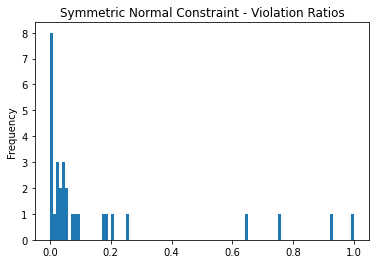

In [69]:
symmConstDF3.sort_values(by=['violation_ratio'],ascending=False)['violation_ratio'].plot.hist(bins=100).set_title("Symmetric Normal Constraint - Violation Ratios")

In [70]:
pd.concat([symmConstDF1, symmConstDF2, symmConstDF3]).to_csv('../../allConstraintsAnalysis_Final/symmConstDFAnalysis.csv')

In [71]:
!kgtk cat -i ../../temp/claims.P1560.correct.tsv \
    ../../temp/claims.P1560.incorrect.tsv \
    -o ../../temp/claims.P1560.merged.tsv

In [72]:
!kgtk ifnotexists -i ../../temp/claims.P1560.merged.tsv \
    --filter-on ../../propertiesSplit_FinalWRemoved3/claims.P1560.tsv

[Errno 2] No such file or directory: '../../propertiesSplit_FinalWRemoved3/claims.P1560.tsv'


### Find out time required

In [11]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplit_Final/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("symmConst_Validator_"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/108 [00:00<?, ?it/s]

In [12]:
print(pd.Series(times).describe())

count     38.000000
mean      15.315868
std       61.526228
min        2.069000
25%        2.617750
50%        3.003000
75%        5.889250
max      383.135000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for symmetric constraint checks')

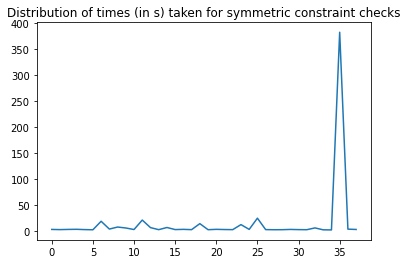

In [13]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for symmetric constraint checks")

## Inverse Constraint (Q21510855)

This constraint says, if node1 has a property with this constraint, then both `(node1)-[prop]->(node2)` and `(node2)-[prop]->(node1)` must be present with few exceptions

### Constraints File

In [169]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz \
    ../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz \
    --match "p: (nodeProp1)-[nodePropEdge:P2302]->(:Q21510855)" \
    -o ../../constraintsOP/inverseConstraint/claims.constraints_list.tsv \
    --graph-cache ~/sqlite3_caches/temp1345.valuetype.sqlite3.db

[2021-04-15 03:26:20 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     WHERE graph_1_c1."label"=?
     AND graph_1_c1."node2"=?
  PARAS: ['P2302', 'Q21510855']
---------------------------------------------


In [170]:
!head ../../constraintsOP/inverseConstraint/claims.constraints_list.tsv

id	node1	label	node2	rank	node2;wikidatatype
P1026-P2302-Q21510855-adc83b86-0	P1026	P2302	Q21510855	normal	wikibase-item
P1029-P2302-Q21510855-6b55e057-0	P1029	P2302	Q21510855	normal	wikibase-item
P115-P2302-Q21510855-f7aa0b78-0	P115	P2302	Q21510855	normal	wikibase-item
P1151-P2302-Q21510855-0d9aa9c6-0	P1151	P2302	Q21510855	normal	wikibase-item
P1204-P2302-Q21510855-e3d53bb6-0	P1204	P2302	Q21510855	normal	wikibase-item
P1283-P2302-Q21510855-0e7699bb-0	P1283	P2302	Q21510855	normal	wikibase-item
P1308-P2302-Q21510855-2aba96b7-0	P1308	P2302	Q21510855	normal	wikibase-item
P1365-P2302-Q21510855-c809b758-0	P1365	P2302	Q21510855	normal	wikibase-item
P1366-P2302-Q21510855-eee12ef8-0	P1366	P2302	Q21510855	normal	wikibase-item


In [171]:
import pandas as pd
qualiDF = pd.read_csv("../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz",sep='\t')
constDF = pd.read_csv("../../constraintsOP/inverseConstraint/claims.constraints_list.tsv",sep='\t')

In [172]:
constDF2 = constDF.set_index('id').join(qualiDF.set_index('node1'),rsuffix='_qualifier').drop(columns=['id', 'node2;wikidatatype_qualifier', 'rank', 'node2', 'label', 'node2;wikidatatype']).rename(columns={'label_qualifier':'label', 'node2_qualifier': 'node2'})
constDF2 = constDF2.reset_index()
constDF2 = constDF2.rename(columns={'index':'id'})
constDF2['label'] = constDF2.label.fillna("P2316")
constDF2['node2'] = constDF2.node2.fillna("Normal")

In [173]:
constDF2.to_csv("../../constraintsOP/inverseConstraint/claims.constraints_all.tsv",sep="\t",index=False)

In [174]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/inverseConstraint/claims.constraints_all.tsv',sep='\t')

In [175]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [176]:
dfItemRequires['label'].unique()

array(['P2306', 'P2316', 'P4155', 'P2303'], dtype=object)

In [177]:
dfItemRequires['label'].value_counts()

P2306    110
P2316     10
P2303      2
P4155      1
Name: label, dtype: int64

In [178]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [179]:
dfItemRequires.head()

label                                  P2303    P2306        P2316 P4155
node1 id                                                                
P1026 P1026-P2302-Q21510855-adc83b86-0   NaN    [P50]          NaN   NaN
P1029 P1029-P2302-Q21510855-6b55e057-0   NaN  [P5096]          NaN   NaN
P115  P115-P2302-Q21510855-f7aa0b78-0    NaN   [P466]          NaN   NaN
P1151 P1151-P2302-Q21510855-0d9aa9c6-0   NaN  [P1204]  [Q21502408]   NaN
P1204 P1204-P2302-Q21510855-e3d53bb6-0   NaN  [P1151]          NaN   NaN

In [180]:
dfItemRequires = dfItemRequires.droplevel(1)

In [181]:
dfItemRequires.head()

label P2303    P2306        P2316 P4155
node1                                  
P1026   NaN    [P50]          NaN   NaN
P1029   NaN  [P5096]          NaN   NaN
P115    NaN   [P466]          NaN   NaN
P1151   NaN  [P1204]  [Q21502408]   NaN
P1204   NaN  [P1151]          NaN   NaN

### Query Generator

In [182]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0
fOP = None

folderName = 'inverseConstraint'
shellFileSuffix = 'invConst_Validator_'
graph_cache_file_prefix = "inv_new_1_1_"

for prop, constraint in tqdm(dfItemRequires.iterrows()):
#     try:
        
        if type(constraint['P2316']) == list:
            if constraint['P2316'][0] == 'Q21502408':
                subFolderName = "mandatory"
            elif constraint['P2316'][0] == 'Q62026391':
                subFolderName = "suggestion"
        else:
            subFolderName = "normal"
        
        if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop +".tsv")):
            continue
            
        prop2 = constraint['P2306']

        if type(prop2) != list:
            continue
        prop2 = prop2[0]

        if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop2 +".tsv")):
            print(f"File: ../../propertiesSplit_Final/claims.{prop2}.tsv does not exist")
            continue
        
        if cnt % 60 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit_Final/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
            
        command = "{ time ( kgtk --debug query -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
                        ../../propertiesSplit_Final/claims."+ prop2 +".tsv \
                        --match '"+ \
                        f"{prop}: (node1)-[nodeProp]->(node2), {prop2}: (node2)-[]->(node1)' "

        if type(constraint['P2303']) != list: # Exceptions not present
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv "
            
            commandOPFile = "-o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n"
#             print(command)
            fOP.write(command)
        else:
            excptns = set(constraint['P2303'])
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit_Final/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv "
            
            commandOPFile = "-o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv; "
#             print(command)
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
#             print(command)        
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
#             print(command)
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis_Final/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit_Final/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt; \n"
#             print(command)
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

0it [00:00, ?it/s]

In [183]:
cnt

110

In [184]:
# import os
# for i in range(1,7):
#     os.system("screen -dm sh ../../propertiesSplit_Final/checkViolations/invConst_Validator_"+str(i)+".sh")

### Analyze Violations

In [73]:
import pandas as pd
import os
from tqdm.notebook import tqdm

invConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

invConstViolations = {}
invConstPropList = set()

# codepConstViolationsSummary = {}


filePath = "../../allConstraintsAnalysis_Final/inverseConstraint/"
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    for filename in tqdm(os.listdir(filePath + folder)):
        prop = filename.split(".")[1]
        correctness = filename.split(".")[2]
        if correctness not in ['correct','incorrect']:
            continue
        invConstPropList.add(prop)
        count1 = countLines(filePath+folder+'/'+filename)
        if folder not in invConstViolations:
            invConstViolations[folder] = {}
        if prop not in invConstViolations[folder]:
            invConstViolations[folder][prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        invConstViolations[folder][prop][correctness] = count1
        invConstViolations[folder][prop]['paths'].append(filePath+folder+'/'+filename)

0it [00:00, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [74]:
len(invConstPropList)

110

In [75]:
invConstViolationsSummary = {}
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    invConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
    for prop in invConstViolations[folder].keys():
        invConstViolationsSummary[folder]['correct'] += invConstViolations[folder][prop]['correct']
        invConstViolationsSummary[folder]['incorrect'] += invConstViolations[folder][prop]['incorrect']
    invConstViolationsSummary[folder]['total'] = invConstViolationsSummary[folder]['correct'] + invConstViolationsSummary[folder]['incorrect']
    invConstViolationsSummary[folder]['percIncorrect'] = invConstViolationsSummary[folder]['incorrect'] / invConstViolationsSummary[folder]['total'] * 100
    invConstViolationsSummary[folder]['propCount'] = len(invConstViolations[folder].keys())

0it [00:00, ?it/s]

In [76]:
invConstViolationsSummary

{'mandatory': {'correct': 6564,
  'incorrect': 133,
  'total': 6697,
  'percIncorrect': 1.9859638644169029,
  'propCount': 6},
 'normal': {'correct': 7131934,
  'incorrect': 204841,
  'total': 7336775,
  'percIncorrect': 2.7919760385182864,
  'propCount': 100},
 'suggestion': {'correct': 2002102,
  'incorrect': 95351,
  'total': 2097453,
  'percIncorrect': 4.546037503581725,
  'propCount': 4}}

In [77]:
noOfStmts = 0
for fold in invConstViolationsSummary.keys():
    noOfStmts += invConstViolationsSummary[fold]['total']
noOfStmts

9440925

In [78]:
invConstDF1 = pd.DataFrame(invConstViolations['mandatory']).T
invConstDF1['violation_ratio'] = invConstDF1.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)
invConstDF1.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P2673     819        69  [../../allConstraintsAnalysis_Final/inverseCon...   
P4147     271         9  [../../allConstraintsAnalysis_Final/inverseCon...   
P4149     272         4  [../../allConstraintsAnalysis_Final/inverseCon...   
P2033    1836        26  [../../allConstraintsAnalysis_Final/inverseCon...   
P450     1754        21  [../../allConstraintsAnalysis_Final/inverseCon...   
P1151    1612         4  [../../allConstraintsAnalysis_Final/inverseCon...   

       violation_ratio  
P2673         0.077703  
P4147         0.032143  
P4149         0.014493  
P2033         0.013963  
P450          0.011831  
P1151         0.002475

In [79]:
invConstDF2 = pd.DataFrame(invConstViolations['suggestion']).T
invConstDF2['violation_ratio'] = invConstDF2.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)
invConstDF2.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P1434    3512      4745  [../../allConstraintsAnalysis_Final/inverseCon...   
P155   963205     49783  [../../allConstraintsAnalysis_Final/inverseCon...   
P156   963183     40682  [../../allConstraintsAnalysis_Final/inverseCon...   
P629    72202       141  [../../allConstraintsAnalysis_Final/inverseCon...   

       violation_ratio  
P1434         0.574664  
P155          0.049145  
P156          0.040525  
P629          0.001949

In [80]:
invConstDF3 = pd.DataFrame(invConstViolations['normal']).T
invConstDF3['violation_ratio'] = invConstDF3.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)
invConstDF3.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P1605      12       189  [../../allConstraintsAnalysis_Final/inverseCon...   
P3448     583      4266  [../../allConstraintsAnalysis_Final/inverseCon...   
P926        1         6  [../../allConstraintsAnalysis_Final/inverseCon...   
P925        1         5  [../../allConstraintsAnalysis_Final/inverseCon...   
P1029     475      2263  [../../allConstraintsAnalysis_Final/inverseCon...   
P115     6712     24515  [../../allConstraintsAnalysis_Final/inverseCon...   
P8625       7        17  [../../allConstraintsAnalysis_Final/inverseCon...   
P5132      81        89  [../../allConstraintsAnalysis_Final/inverseCon...   
P425     2512      2024  [../../allConstraintsAnalysis_Final/inverseCon...   
P3816      14        10  [../../allConstraintsAnalysis_Final/inverseCon...   
P2512     210       149  [../../allConstraintsAnalysis_Final/inverseCon...   
P1677       6         4  [../../allConstraintsAnalysis_Final/inverseCon...   
P2578     989       604  [../../allConstraintsAnalysis_Final/inverseCon...   
P3261     232       125  [../../allConstraintsAnalysis_Final/inverseCon...   
P568     1049       450  [../../allConstraintsAnalysis_Final/inverseCon...   

       violation_ratio  
P1605         0.940299  
P3448         0.879769  
P926          0.857143  
P925          0.833333  
P1029         0.826516  
P115          0.785058  
P8625         0.708333  
P5132         0.523529  
P425          0.446208  
P3816         0.416667  
P2512         0.415042  
P1677         0.400000  
P2578         0.379159  
P3261         0.350140  
P568          0.300200

In [81]:
!head ../../allConstraintsAnalysis_Final/inverseConstraint/normal/claims.P925.incorrect.tsv

id	node1	label	node2	rank	node2;wikidatatype
Q1133903-P925-Q18707-eae3a579-0	Q1133903	P925	Q18707	normal	wikibase-item
Q1570272-P925-Q7135001-5dbdce8c-0	Q1570272	P925	Q7135001	normal	wikibase-item
Q301613-P925-Q7135001-528c29b2-0	Q301613	P925	Q7135001	normal	wikibase-item
Q452595-P925-Q864951-c5b34e11-0	Q452595	P925	Q864951	normal	wikibase-item
Q5064084-P925-Q4117017-76545a06-0	Q5064084	P925	Q4117017	normal	wikibase-item


Text(0.5, 1.0, 'Symmetric Normal Constraint - Violation Ratios')

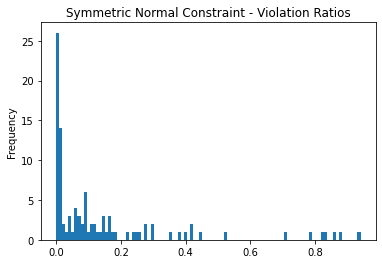

In [82]:
invConstDF3.sort_values(by=['violation_ratio'],ascending=False)['violation_ratio'].plot.hist(bins=100).set_title("Symmetric Normal Constraint - Violation Ratios")

In [83]:
pd.concat([invConstDF1, invConstDF2, invConstDF3]).to_csv('../../allConstraintsAnalysis_Final/invConstDFAnalysis.csv')

### Find out time required

In [55]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplit_Final/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("invConst_Validator_new3"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/122 [00:00<?, ?it/s]

In [56]:
print(pd.Series(times).describe())

count    110.000000
mean       7.526318
std       11.686634
min        1.519000
25%        2.624000
50%        3.298500
75%        6.463250
max       80.846000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for symmetric constraint checks')

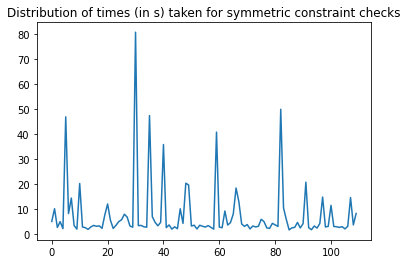

In [57]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for symmetric constraint checks")

# Combine Plots for constraints

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

typeConstDF = pd.read_csv("../../allConstraintsAnalysis_Final/typeConstDFAnalysis.csv")
typeConstDF = typeConstDF.set_index(typeConstDF.iloc[:, 0])

valTypeConstDF = pd.read_csv("../../allConstraintsAnalysis_Final/valueTypeConstDFAnalysis.csv")
valTypeConstDF = valTypeConstDF.set_index(valTypeConstDF.iloc[:, 0])

codepConstDF1 = pd.read_csv("../../allConstraintsAnalysis_Final/codepConstDFAnalysis.csv")
codepConstDF1 = codepConstDF1.set_index(codepConstDF1.iloc[:, 0])

symmConstDF = pd.read_csv("../../allConstraintsAnalysis_Final/symmConstDFAnalysis.csv")
symmConstDF = symmConstDF.set_index(symmConstDF.iloc[:, 0])

invConstDF = pd.read_csv("../../allConstraintsAnalysis_Final/invConstDFAnalysis.csv")
invConstDF = invConstDF.set_index(invConstDF.iloc[:, 0])

FileNotFoundError: [Errno 2] No such file or directory: '../../allConstraintsAnalysis_Final/typeConstDFAnalysis.csv'

In [ ]:
typeConstDF1 = typeConstDF.add_suffix("_type_const")['violation_ratio_type_const'].rename().sort_values()

In [ ]:
valTypeConstDF1 = valTypeConstDF.add_suffix("_valuetype_const")['violation_ratio_valuetype_const'].sort_values()

In [ ]:
codepConstDF1_1 = codepConstDF1.add_suffix("_codep_const")['violation_ratio_codep_const'].sort_values()

In [ ]:
symmConstDF1_1 = symmConstDF.add_suffix("_symm_const")['violation_ratio_symm_const'].sort_values()

In [ ]:
invConstDF1_1 = invConstDF.add_suffix("_inv_const")['violation_ratio_inv_const'].sort_values()

In [ ]:
typeConstDF1.index.names = ['property']
typeConstDF1 = typeConstDF1.reset_index().reset_index()
typeConstDF1['index'] = typeConstDF1['index'].apply(lambda p: (p+1) * 100/len(typeConstDF1))
typeConstDF1 = typeConstDF1.set_index('index')[0]

In [ ]:
valTypeConstDF1.index.names = ['property']
valTypeConstDF1 = valTypeConstDF1.reset_index().reset_index()
valTypeConstDF1['index'] = valTypeConstDF1['index'].apply(lambda p: (p+1) * 100/len(valTypeConstDF1))
valTypeConstDF1 = valTypeConstDF1.set_index('index')['violation_ratio_valuetype_const']

In [ ]:
codepConstDF1_1.index.names = ['property']
codepConstDF1_1 = codepConstDF1_1.reset_index().reset_index()
codepConstDF1_1['index'] = codepConstDF1_1['index'].apply(lambda p: (p+1) * 100/len(codepConstDF1_1))
codepConstDF1_1 = codepConstDF1_1.set_index('index')['violation_ratio_codep_const']

In [ ]:
symmConstDF1_1.index.names = ['property']
symmConstDF1_1 = symmConstDF1_1.reset_index().reset_index()
symmConstDF1_1['index'] = symmConstDF1_1['index'].apply(lambda p: (p+1) * 100/len(symmConstDF1_1))
symmConstDF1_1 = symmConstDF1_1.set_index('index')['violation_ratio_symm_const']

In [ ]:
invConstDF1_1.index.names = ['property']
invConstDF1_1 = invConstDF1_1.reset_index().reset_index()
invConstDF1_1['index'] = invConstDF1_1['index'].apply(lambda p: (p+1) * 100/len(invConstDF1_1))
invConstDF1_1 = invConstDF1_1.set_index('index')['violation_ratio_inv_const']

In [ ]:
typeConstDF2 = [np.percentile(typeConstDF1,i)*100 for i in range(1, 101)]
valTypeConstDF2 = [np.percentile(valTypeConstDF1,i)*100 for i in range(1, 101)]
codepConstDF1_2 = [np.percentile(codepConstDF1_1,i)*100 for i in range(1, 101)]
symmConstDF1_2 = [np.percentile(symmConstDF1_1,i)*100 for i in range(1, 101)]
invConstDF1_2 = [np.percentile(invConstDF1_1,i)*100 for i in range(1, 101)]

In [ ]:
constAnalysisDF = pd.DataFrame({'index':list(range(1, 101)), 'type': typeConstDF2, 'value type': valTypeConstDF2, 'irs': codepConstDF1_2, 'symmetric': symmConstDF1_2, 'inverse': invConstDF1_2})

In [ ]:
constAnalysisDF = constAnalysisDF.melt('index', var_name='constraint',  value_name='VR')

In [ ]:
constAnalysisDF.head()

[Text(0.5, 0, 'Proportion of properties (in %)'),
 Text(0, 0.5, 'Violation Ratio (in %)')]

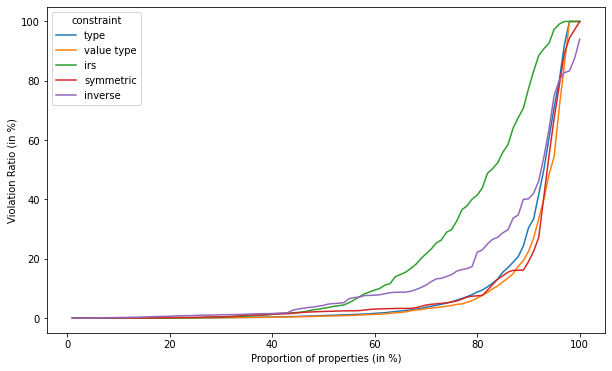

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='index', y='VR', hue='constraint', data=constAnalysisDF)
ax.set(xlabel="Proportion of properties (in %)", ylabel = "Violation Ratio (in %)")

## Option 2

# Analysis on properties with constraints

In [26]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz \
    ../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz \
    --match "p: (nodeProp1)-[nodePropEdge:P2302]->()" \
    -o ../../constraintsOP/claims.constraints_list.tsv \
    --graph-cache ~/sqlite3_caches/temp1345.valuetype.sqlite3.db

[2021-04-03 09:14:12 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     WHERE graph_1_c1."label"=?
  PARAS: ['P2302']
---------------------------------------------


In [39]:
!kgtk unique -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz --column node1 -o ../../constraintsOP/claims.propList.tsv

In [42]:
!head ../../constraintsOP/claims.propList.tsv

node1	label	node2
P10	count	17
P1000	count	10
P1001	count	26
P1002	count	9
P1003	count	20
P1004	count	33
P1005	count	21
P1006	count	26
P1007	count	19


In [43]:
import pandas as pd
import os
props = pd.read_csv("../../constraintsOP/claims.constraints_list.tsv", sep='\t')

In [44]:
props2 = props.groupby(['node1']).node2.apply(list)

In [45]:
len(props2)

8100

In [48]:
cnt = 0
totalCnt = 0
for prop in props2.index:
    totalCnt += 1
    if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop +".tsv")):
        continue
    else:
        cnt += 1
cnt, totalCnt

(2336, 8100)

In [50]:
props2.head(500)

node1
P10      [Q21502404, Q21510851, Q21510852, Q52004125, Q...
P1000                    [Q21510856, Q21510865, Q53869507]
P1001         [Q21502838, Q21503250, Q21510865, Q25796498]
P1002                               [Q21503250, Q21510865]
P1003    [Q19474404, Q21502404, Q21502410, Q21510851, Q...
                               ...                        
P1563    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1564    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1565    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1566    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
P1567    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
Name: node2, Length: 500, dtype: object

In [32]:
import pandas as pd
import os
props2 = pd.read_csv("../../constraintsOP/claims.propList.tsv", sep='\t')

In [33]:
props2 = props2.groupby(['node1']).node2.apply(list)

In [34]:
len(props2)

8193

In [35]:
cnt = 0
totalCnt = 0
for prop in props2.index:
    totalCnt += 1
    if not(os.path.isfile("../../propertiesSplit_Final/claims."+ prop +".tsv")):
        continue
    else:
        cnt += 1
cnt, totalCnt

(2415, 8193)

In [50]:
props2.head(500)

node1
P10      [Q21502404, Q21510851, Q21510852, Q52004125, Q...
P1000                    [Q21510856, Q21510865, Q53869507]
P1001         [Q21502838, Q21503250, Q21510865, Q25796498]
P1002                               [Q21503250, Q21510865]
P1003    [Q19474404, Q21502404, Q21502410, Q21510851, Q...
                               ...                        
P1563    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1564    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1565    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1566    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
P1567    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
Name: node2, Length: 500, dtype: object